# **Dataset : Data Saudi Used Car**

In [1]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('data_saudi_used_cars.csv')
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


# **1. Bussiness Problem Understanding**

## **a. Context**

`Syarah.com` merupakan situs web yang menawarkan layanan jual-beli mobil bekas di Timur Tengah, terutama di negara-negara seperti Arab Saudi dan Uni Emirat Arab. Syarah.com menyediakan platform untuk pengguna membeli dan menjual mobil bekas serta menyediakan informasi terkait otomotif seperti tips perawatan mobil, ulasan kendaraan, dan berita industri otomotif. Proses penjualan pada platform ini calon penjual melakukan pembuatan akun dan dokumentasi mobil yang akan dijual pada website tersebut, lalu tim Syarah.com akan melakukan inspeksi terhadap mobil yang ditawarkan.

Penjual dibebaskan untuk memberikan harga jual sesuai keinginan. Namun jika penjual memberikan harga yang lebih mahal dari harga pasar pada umumnya menyebabkan iklan/ penawaran yang ditawarkan dapat menyebabkan mobil sulit terjual. Sehingga untuk beberapa user dan pengguna baru membutuhkan informasi mengenai harga pasar mobil yang dijualnya. 

## **b. Problem Statement**

Maraknya website dan platform jual-beli mobil bekas mendorong Syarah.com untuk mampu memberikan standar minimal/maksimum harga bagi para calon penjual agar dapat memuaskan calon pembeli yang melakukan transaksi pada website/platform Syarah.com. Untuk melakukan prediksi harga jual mobil maka dibutuhkan data dari para penjual yang telah listing mobilnya pada website untuk dijadikan acuan pemodelan agar dapat memprediksi Harga jual yang direkomendasikan oleh Syarah.com.

## **c. Goals**

Berdasarkan permasalahan tersebut, agar calon pembeli/penjual pada platform tersebut merasa harga yang ditawarkan normal bedasarkan pasarnya. Bagi Syarah.com, prediction harga yang dapat memberikan prediksi harga secara fair agar dapat meningkatkan jumlah pengguna/pengunjung maupun listing. Dengan kata lain, semakin banyak pengguna baik calon pembeli dan penjual berarti dapat meningkatkan revenue perusahaan, dalam konteks ini didapat dari 'bagi hasil' antara listing/penjual dan perusahaan.

## **d. Analytic Approach**

Untuk dapat merekomendasikan suatu prediksi harga, kita melakukan percobaan pemodelan dengan mencoba berbagai `Algoritma regresi` diantaranya:
- Linear Regression
- K-Nearest Neighbors Algorithm
- Decision Tree
- Random Forest
- XGboost

## **e. Metric Evaluation**

Untuk megetahui performa suatu model memprediksi targetnya maka kita membutuhkan metric evaluation dengan mengukur nilai errornya. Pada percobaan ini kita menggunakan beberapa metric evaluation diantaranya :
- RMSE (Root Mean Square Error)
- MAE (Mean Absolute Error)
- MAPE (Mean Absolute Percentage Error)

Semakin kecil nilai metric evaluation, maka semakin kecil errornya menunjukkan semakin baik suatu model memprediksi nilai targetnya

# **2. Data Understanding**

Data set ini merupakan data listing sebuat website Jual-Beli Mobil Bekas di Arab Saudi. Data ini berisikan 5623 baris dan 11 kolom. 
- 6 kolom kategorical
- 4 kolom numerical
- 1 kolom boolean

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Type | Categorical | Type of used car |
| Region | Categorical | The region in which the used car was offered for sale |
| Make | Categorical | The company name |
| Gear_Type | Categorical | Gear type size of used car |
| Origin | Categorical | Origin of used car/Country of importer |
| Option | Categorical | Options of used car|
| Year | Numerical | Manufacturing year|
| Engine_Size | Numerical | The engine size of used car|
| Mileage | Numerical | Mileage of used car	|
| Negotiable | Boolean | True if the price is 0, that means it is negotiable|
| Price | Numerical | Used car price|

Berikut ini merupakan statistik deskriptif dari kolom-kolom numerical

In [4]:
df.describe()

,Year,Engine_Size,Mileage,Price
count,5624.000000,5624.000000,5.624000e+03,5624.000000
mean,2014.101885,3.295430,1.509234e+05,53074.058144
std,5.791606,1.515108,3.828360e+05,70155.340614
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,72932.500000
max,2022.000000,9.000000,2.000000e+07,850000.000000


Berikut ini informasi dari kolom categorical berupa:
- count : jumlah data
- unique : jumlah nilai unique pada kolom
- top : modus pada kolom categorical
- freq : banyaknya nilai modus yang muncul

In [5]:
df.describe(include='object')

,Type,Region,Make,Gear_Type,Origin,Options
count,5624,5624,5624,5624,5624,5624
unique,347,27,58,2,4,3
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full
freq,269,2272,1431,4875,4188,2233


In [6]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns :
 
    listItem.append( [col, df[col].nunique(), df[col].unique()   ])

unique_values = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
unique_values

,Column Name,Number of Unique,Unique Sample
0,Type,347,"[Corolla, Yukon, Range Rover, Optima, FJ, CX3, Cayenne S, Sonata, Avalon, LS, C300, Land Cruiser, Hilux, Tucson, Caprice, Sunny, Pajero, Azera, Focus, 5, Spark, Camry, Pathfinder, Accent, ML, Tahoe, Yaris, Suburban, A, Altima, Traverse, Expedition, Senta fe, Liberty, 3, X, Elantra, Land Cruiser Pickup, VTC, Malibu, The 5, A8, Patrol, Grand Cherokee, SL, Previa, SEL, Aveo, MKZ, Victoria, Datsun, Flex, GLC, ES, Edge, 6, Escalade, Innova, Navara, H1, G80, Carnival, Symbol, Camaro, Accord, Avanza, Land Cruiser 70, Taurus, C5700, Impala, Optra, S, Other, Cerato, Furniture, Murano, Explorer, LX, Pick up, Charger, H6, BT-50, Hiace, Ranger, Fusion, Rav4, Ciocca, CX9, Kona, Sentra, Sierra, Durango, CT-S, Sylvian Bus, Navigator, Opirus, Marquis, The 7, FX, Creta, ...]"
1,Region,27,"[Abha, Riyadh, Hafar Al-Batin, Aseer, Makkah, Dammam, Yanbu, Al-Baha, Jeddah, Hail, Khobar, Al-Ahsa, Jazan, Al-Medina, Al-Namas, Tabouk, Taef, Qassim, Arar, Jubail, Sabya, Al-Jouf, Najran, Wadi Dawasir, Qurayyat, Sakaka, Besha]"
2,Make,58,"[Toyota, GMC, Land Rover, Kia, Mazda, Porsche, Hyundai, Lexus, Chrysler, Chevrolet, Nissan, Mitsubishi, Ford, MG, Mercedes, Jeep, BMW, Audi, Lincoln, Cadillac, Genesis, Renault, Honda, Suzuki, Zhengzhou, Dodge, HAVAL, INFINITI, Isuzu, Changan, Aston Martin, Mercury, Great Wall, Other, Rolls-Royce, MINI, Volkswagen, BYD, Geely, Victory Auto, Classic, Jaguar, Daihatsu, Maserati, Hummer, GAC, Lifan, Bentley, Chery, Peugeot, Foton, Škoda, Fiat, Iveco, SsangYong, FAW, Tata, Ferrari]"
3,Gear_Type,2,"[Manual, Automatic]"
4,Origin,4,"[Saudi, Gulf Arabic, Other, Unknown]"
5,Options,3,"[Standard, Full, Semi Full]"
6,Year,50,"[2013, 2014, 2015, 2020, 2019, 2012, 2016, 1998, 2011, 2008, 1982, 1985, 2018, 1983, 2021, 2017, 2002, 2010, 2009, 2004, 2001, 1986, 2007, 1999, 2005, 1977, 1991, 2003, 1995, 2006, 1997, 1993, 1996, 2000, 1990, 1965, 1980, 1987, 1994, 1988, 1989, 1978, 2022, 1975, 1964, 1984, 1979, 1992, 1963, 1981]"
7,Engine_Size,71,"[1.4, 8.0, 5.0, 2.4, 4.0, 2.0, 4.8, 3.5, 4.6, 5.7, 2.7, 1.0, 3.0, 1.6, 1.5, 3.3, 6.2, 2.5, 5.3, 3.6, 5.4, 1.7, 3.7, 9.0, 4.7, 4.5, 3.8, 5.5, 2.6, 1.8, 1.2, 6.0, 6.9, 3.2, 5.9, 2.2, 5.6, 1.1, 2.9, 4.1, 1.3, 4.4, 2.8, 3.4, 8.8, 6.1, 7.0, 1.9, 7.5, 4.3, 6.5, 3.1, 6.3, 6.4, 5.8, 8.5, 2.3, 6.6, 7.2, 4.2, 5.1, 7.4, 5.2, 2.1, 6.7, 7.8, 3.9, 8.7, 4.9, 6.8, 8.9]"
8,Mileage,1716,"[421000, 80000, 140000, 220000, 49000, 25000, 189000, 155, 110864, 300, 200, 79000, 299000, 17000, 209, 340000, 30000, 71000, 85000, 500000, 290, 74715, 250, 284000, 98000, 3400, 108, 350000, 550000, 204000, 139240, 296, 105920, 187000, 10000, 18500, 292000, 280000, 270000, 345500, 110000, 247000, 55800, 92000, 27000, 600000, 307801, 62000, 38000, 89000, 137000, 422000, 208000, 11000, 245000, 500, 150000, 81000, 156000, 42000, 228000, 24000, 266000, 98100, 182000, 210800, 88000, 214000, 82808, 4000, 417970, 70000, 115, 270373, 91440, 45000, 96000, 50100, 35449, 180, 66200, 100, 349000, 168000, 105000, 130000, 212000, 139740, 256, 280, 73000, 240000, 866, 216, 183000, 148000, 4358765, 188257, 117000, 160000, ...]"
9,Negotiable,2,"[True, False]"


# **3. Explaratory Analysis**

## **a. Numerical Variables**

In [7]:
df_model=df.copy()

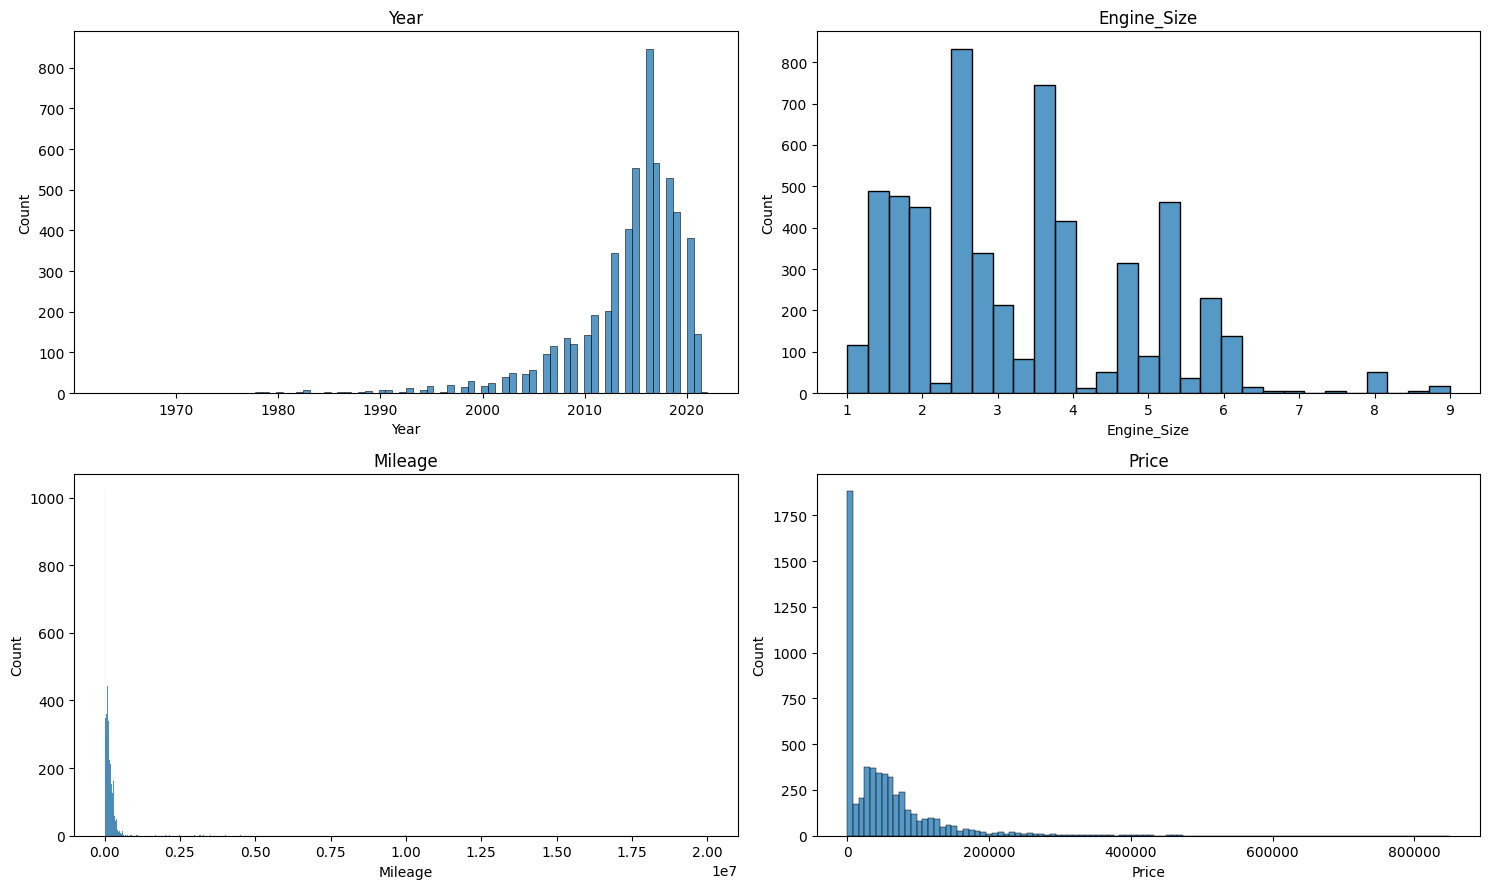

In [8]:
numerical_features = df_model.describe().columns
plt.figure(figsize= (15, 9))
ax = 1

for col in numerical_features:

    plt.subplot(2, 2, ax)
    sns.histplot(data= df_model, x= col)
    plt.title(f'{col}', size= 12)
    ax+= 1

plt.tight_layout()
plt.show()

Berdasarkan gambar histogram diatas dapat diketahui bahwa:
- Data Mileage, Engine_Size, dan Price tidak berdistribusi normal (Right Skew)
- Data Year tidak berdistribusi normal (Left Skew)

## **b. Categorical Variables**

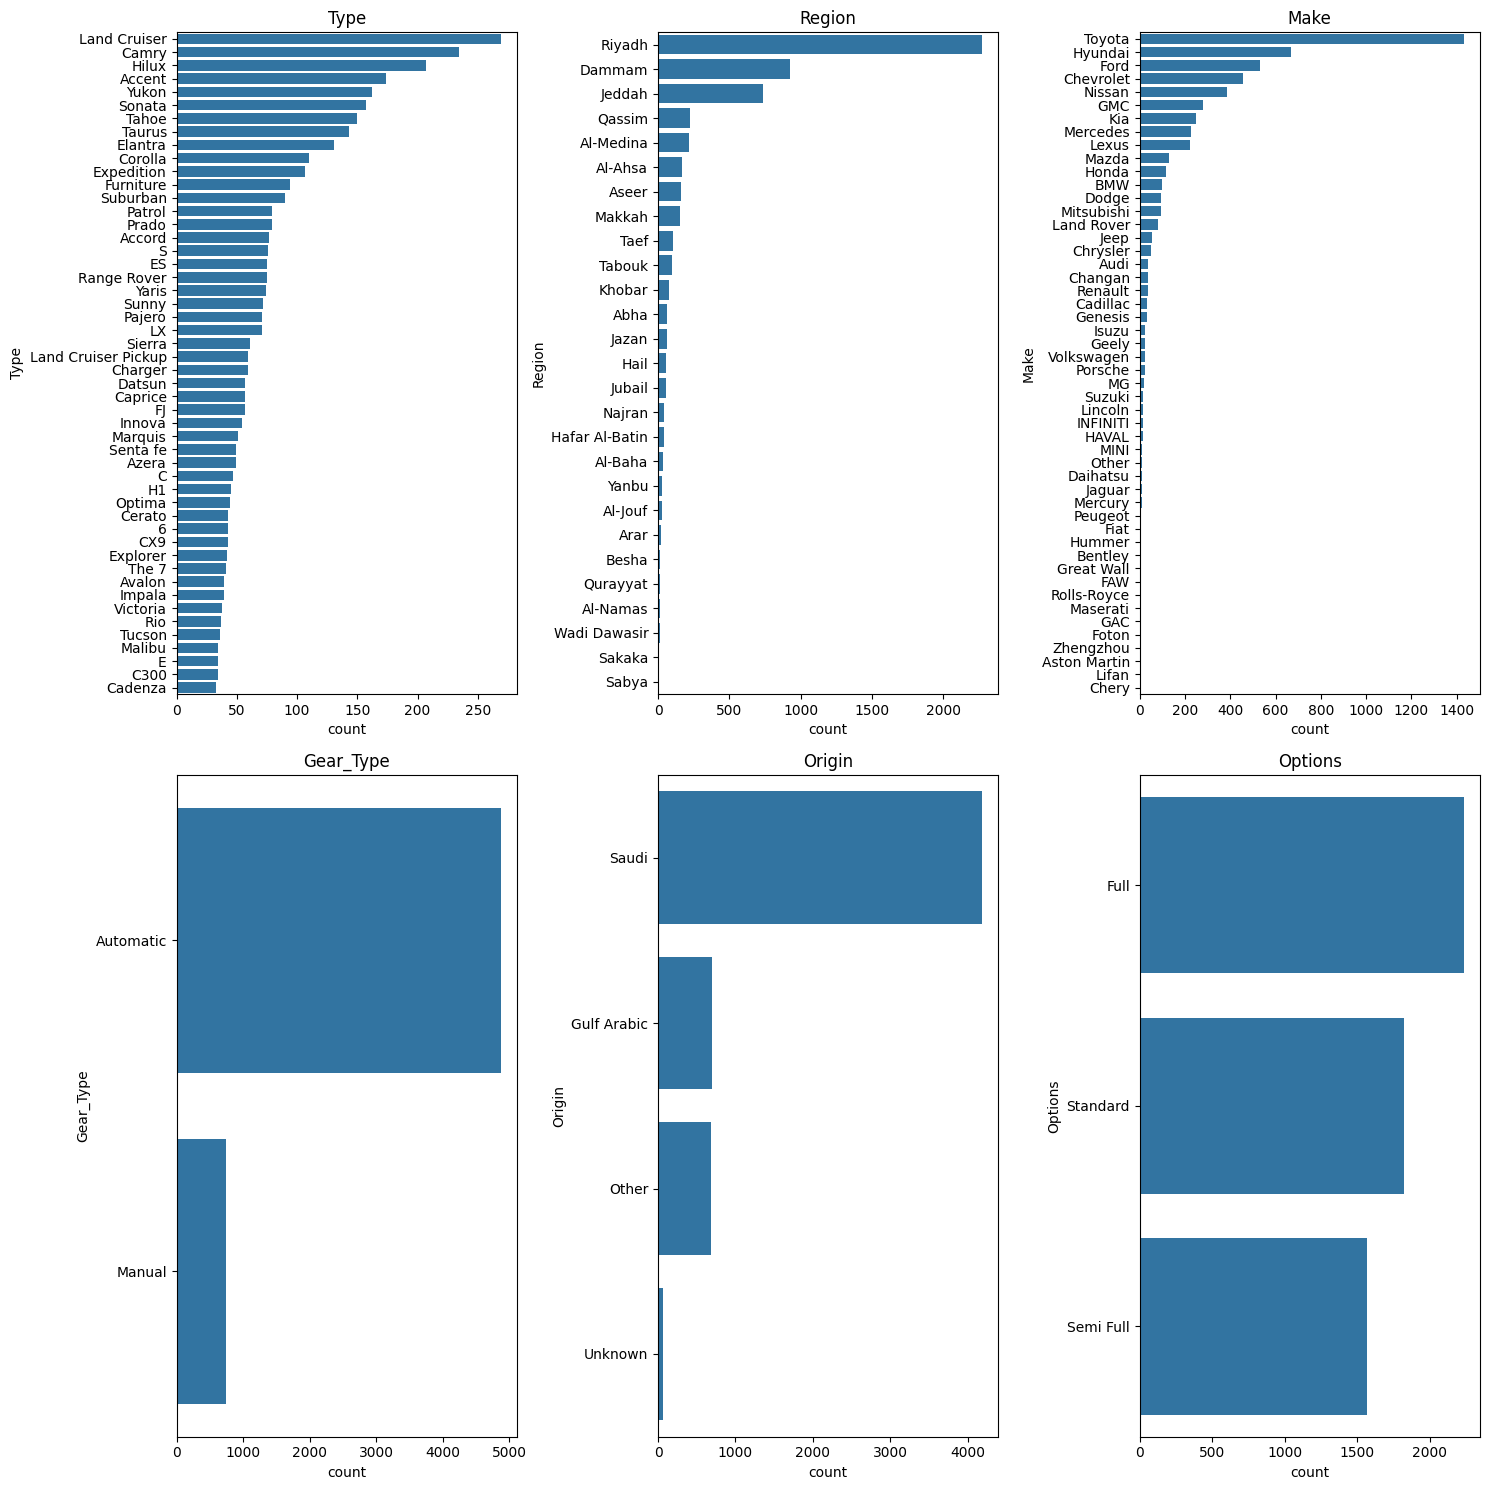

In [9]:
categorical_features = df_model.describe(include='O').columns
plt.figure(figsize=  (15, 15))
ax = 1

for col in categorical_features:

    plt.subplot(2, 3, ax)
    sns.countplot(data=df_model, y= col, order=df_model[col].value_counts().head(50).index)
    plt.title(f'{col}', size= 12)
    ax += 1

plt.tight_layout()
plt.show()

Berdasarkan data diatas didapatkan informasi sebagai berikut:
- Merk mobil yang banyak di listing pada Platform Syarah.com yaitu `Merk Toyota`
- Dapat dilihat juga dari 3 teratas Type Mobil : `Land Cruiser, Camry, Hilux merupakan Merk Toyota`
- Mobil yang banyak dijual berasal dari `Saudi Arabia` dari kota `Riyadh yang merupakan Ibukota Saudi Arabia`
- Mobil yang banyak dijual yaitu dengan `transmisi Automatic`
- Mobil yang paling banyak dijual adalah mobil dengan `opsi lengkap (Full)`, dibandingkan dengan yang standard dan semi lengkap

# **4. Data Cleaning, Feature Selection, and Feature Engineering**

## **a. Check Missing Value**

Terdapat data yang Unknown pada tabel Origin, data tersebut dapat kita anggap sebagai missing value. Untuk handling data missing value, kita melakukan pendekatan mengganti nilai yang `Unknown` menjadi `Other` karena data other pada menjelaskan data `Origin` yang selain berasal dari Saudi dan Gulf Arabic

In [10]:
df_model = df_model.replace('Unknown', 'Other')

In [11]:
df_model[df_model['Origin'].isna()]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price


In [12]:
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Type,object,0,0.0,347,"[A5, Centennial]"
1,Region,object,0,0.0,27,"[Al-Baha, Riyadh]"
2,Make,object,0,0.0,58,"[Lincoln, Cadillac]"
3,Gear_Type,object,0,0.0,2,"[Manual, Automatic]"
4,Origin,object,0,0.0,3,"[Saudi, Gulf Arabic]"
5,Options,object,0,0.0,3,"[Standard, Full]"
6,Year,int64,0,0.0,50,"[1981, 1998]"
7,Engine_Size,float64,0,0.0,71,"[5.9, 3.8]"
8,Mileage,int64,0,0.0,1716,"[64126, 243000]"
9,Negotiable,bool,0,0.0,2,"[True, False]"


In [13]:
df_model.isna().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

## **b. Check Data Duplicate**

Pada dataset ini terdapat 4 data duplikat. Apabila data duplikat tidak dihapus akan mengakibatkan overfitting pada pemodelan. Sehingga akan kita lakukan drop agar mengoptimalkan proses pemodelan

In [14]:
df_model.duplicated().sum()

4

In [15]:
df_model= df_model.drop_duplicates()

## **c. Data Anomalies**

### **- Data Negotiable**

In [16]:
df_model['Negotiable'].value_counts()

Negotiable
False    3825
True     1795
Name: count, dtype: int64

In [17]:
df_model[(df_model['Negotiable'] == False) & (df_model['Price']==0)]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
3168,Furniture,Riyadh,Toyota,Automatic,Other,Semi Full,2012,2.7,225000,False,0


Setiap kolom Negotiable yang memiliki nilai True, pada kolom Price bernilai 0. Sedangkan, kolom Price merupakan Target (Label) yang akan diprediksi. Nilai Price yang dijadikan Target tidak boleh bernilai nol dan diisi secara manual. Sehingga handling pada data anomali ini kita lakukan tahap berikut ini:
- Drop kolom Negotiable 
- Drop baris yang memiliki nilai Price bernilai 0

In [18]:
df_model= df_model.drop(columns='Negotiable')

In [19]:
df_model = df_model[df_model['Price'] != 0]

In [20]:
df_model[df_model['Price']==0]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price


### -**Price**

In [21]:
df_model.describe()

,Year,Engine_Size,Mileage,Price
count,3824.000000,3824.000000,3.824000e+03,3824.000000
mean,2014.851203,3.181119,1.426211e+05,78019.245031
std,5.110916,1.458832,3.783942e+05,72748.182183
min,1963.000000,1.000000,1.000000e+02,1.000000
25%,2013.000000,2.000000,4.800000e+04,35000.000000
50%,2016.000000,2.700000,1.030000e+05,58000.000000
75%,2018.000000,4.000000,1.830000e+05,94250.000000
max,2021.000000,9.000000,2.000000e+07,850000.000000


In [22]:
df_model[df_model['Price']<100]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
3131,Yukon,Jubail,GMC,Automatic,Saudi,Full,2019,5.3,50000,1


Berdasarkan hasil tersebut ditemukan harga mobil yang 1 SAR atau kira-kira berharga Rp.4000. 

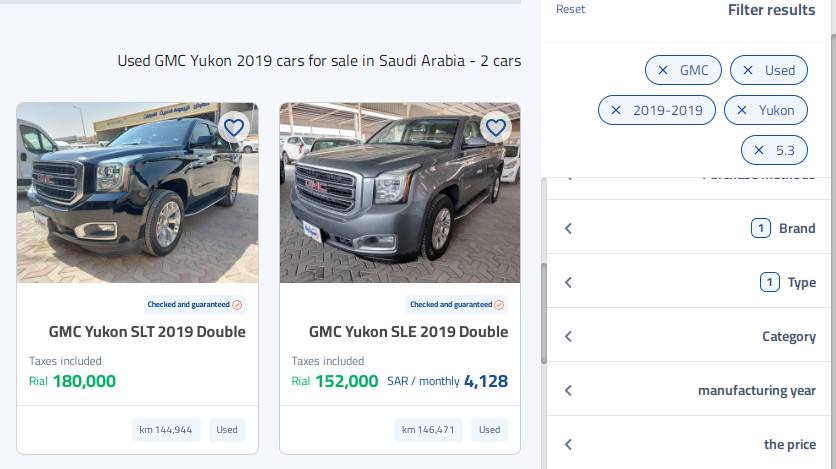

Berdasarkan link penjual mobil pada sumber [ini](https://syarah.com/filters?is_online=1&is_new=0&model_id=1406&year_from=2019&year_to=2019&engine_size=44), harga mobil merk GMC Type Yukon tahun 2019 sebesar 152000-180000 SAR. Harga 1 SAR atau setara 4000 Rupiah dirasa tidak normal, sehingga keputusan untuk data pada indeks ke-3131 dilakukan penghapusan.

In [23]:
df_model=df_model.drop(3131)

## **d. Distribution & Outlier**

Selanjutnya, kita akan melakukan cek distribusi data dan outliers untuk tiap numerikal fitur. Jika distribusinya memiliki skewness yang tinggi, salah satu cara yang dapat kita lakukan untuk menguranginya adalah dengan melakukan rekayasa pada tiap fiturnya.

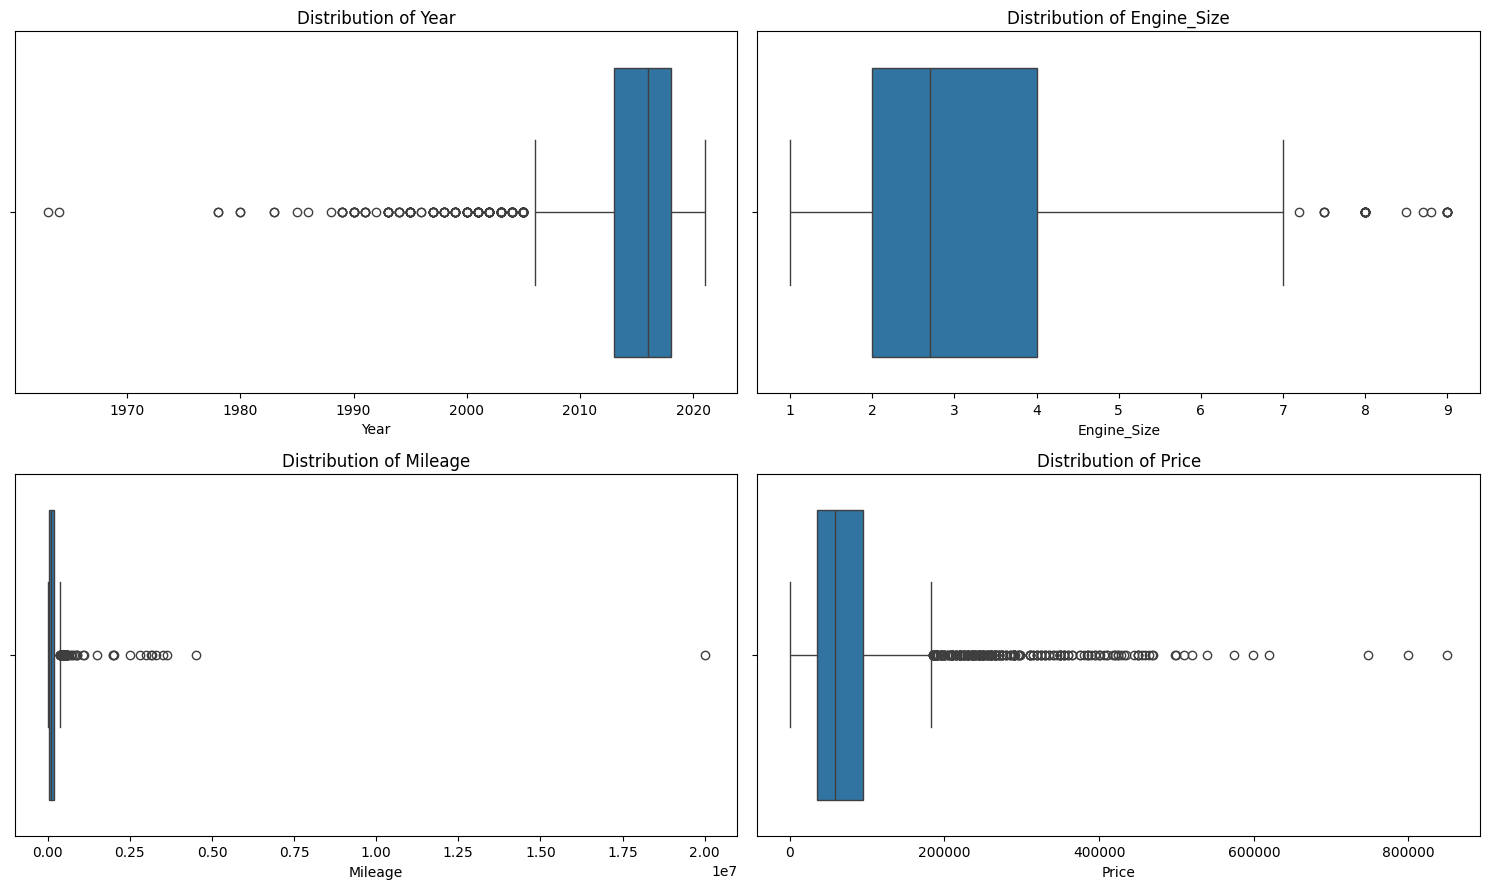

In [24]:
numerical_features = df_model.describe().columns
plt.figure(figsize=  (15, 9))
ax = 1

for col in numerical_features:

    plt.subplot(2, 2, ax)
    sns.boxplot(data= df_model, x= col)
    plt.title(f'Distribution of {col}')
    ax += 1

plt.tight_layout()
plt.show()

In [25]:
list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

for feature in numerical_features: 
    IQR = df_model[feature].quantile(0.75) - df_model[feature].quantile(0.25)
    lower_fence = df_model[feature].quantile(0.25) - 1.5*IQR
    upper_fence = df_model[feature].quantile(0.75) + 1.5*IQR
    list_lower.append(lower_fence)
    list_upper.append(upper_fence)
    number_lower.append(len(df_model[df_model[feature]<lower_fence]))
    number_inside.append(len(df_model[(df_model[feature]>=lower_fence) & (df_model[feature]<=upper_fence)]))
    number_upper.append(len(df_model[df_model[feature]>upper_fence]))
    percentage_outlier.append(round((len(df_model[df_model[feature]<lower_fence]) + len(df_model[df_model[feature]>upper_fence])) / len(df_model)  *100, 2))

outliers = pd.DataFrame({
    'Kolom' : numerical_features,
    'Lower' : list_lower,
    'Upper' : list_upper,
    '# Lower' : number_lower,
    '# Inside' : number_inside,
    '# Upper' : number_upper,
    '% Outlier' : percentage_outlier
})

outliers

,Kolom,Lower,Upper,# Lower,# Inside,# Upper,% Outlier
0,Year,2005.5,2025.5,184,3639,0,4.81
1,Engine_Size,-1.0,7.0,0,3793,30,0.78
2,Mileage,-154500.0,385500.0,0,3692,131,3.43
3,Price,-54250.0,183750.0,0,3564,259,6.77


In [26]:
df_model[df_model['Price']>185000.0]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
17,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full,2019,4.6,71000,200000
60,SL,Jeddah,Mercedes,Automatic,Saudi,Full,2017,4.7,81000,265000
73,Land Cruiser,Qassim,Toyota,Automatic,Saudi,Full,2019,4.5,82808,230000
74,GLC,Dammam,Mercedes,Automatic,Gulf Arabic,Full,2020,2.0,4000,225000
...,...,...,...,...,...,...,...,...,...,...
5530,The 7,Jeddah,BMW,Automatic,Saudi,Full,2019,3.0,14000,247000
5548,The M,Riyadh,BMW,Automatic,Saudi,Full,2020,6.0,13000,385000
5555,S8,Dammam,Audi,Automatic,Gulf Arabic,Full,2016,4.0,42000,229000
5573,S,Jeddah,Mercedes,Automatic,Saudi,Semi Full,2015,4.0,157000,215000


In [27]:
df_model[df_model['Price']<10000.0]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
20,Sunny,Riyadh,Nissan,Manual,Saudi,Standard,2011,1.4,290,7000
46,Elantra,Abha,Hyundai,Automatic,Saudi,Semi Full,2020,2.0,27000,1010
62,SEL,Tabouk,Mercedes,Automatic,Saudi,Full,1986,3.0,500000,5500
65,Malibu,Arar,Chevrolet,Automatic,Saudi,Standard,2021,1.5,24000,1200
110,Optra,Riyadh,Chevrolet,Automatic,Saudi,Standard,2007,1.6,2000000,5000
...,...,...,...,...,...,...,...,...,...,...
5521,Suburban,Al-Medina,Chevrolet,Automatic,Other,Semi Full,1997,6.0,292764,4000
5523,Tucson,Makkah,Hyundai,Automatic,Saudi,Semi Full,2020,2.0,58000,1313
5547,Optima,Qassim,Kia,Automatic,Saudi,Standard,2019,2.0,91000,1440
5599,Corolla,Dammam,Toyota,Manual,Other,Standard,1997,1.3,32500,7000


In [28]:
df_model[df_model['Mileage']>6000000]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
3403,Optra,Riyadh,Chevrolet,Manual,Other,Semi Full,2009,1.6,20000000,9000


### **Handling Outlier Year**

Berdasarkan hasil pengecekan outlier pada Tabel Year terdapat 4.78% data yang outlier. Sebelum kita melakukan handling Outlier pada data Year. Pertama kita melakukan pengecekan perbandingan Nilai Median Price terhadap Year (Data Keseluruhan) dengan Nilai Median Price terhadap Year (Data Oulier : <2005), apakah berbeda signifikan?

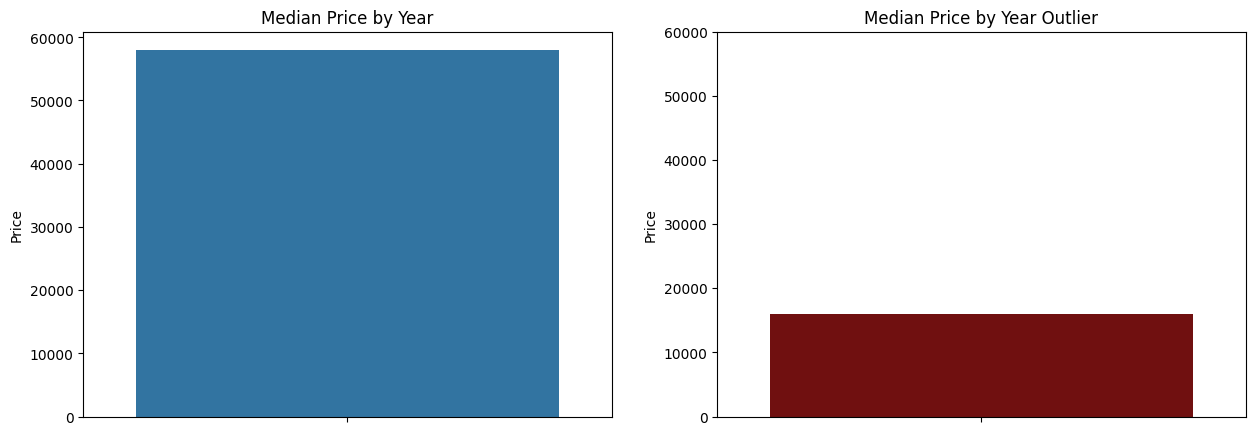

In [29]:
plt.figure(figsize=  (15, 5))
year_outlier = df_model[df_model['Year'] <= 2005]

plt.subplot(1, 2, 1)
sns.barplot(data= df_model, y= 'Price', estimator='median',ci=0)
plt.yticks(range(0, 60001, 10000))
plt.title('Median Price by Year')

plt.subplot(1, 2, 2)
sns.barplot(data= year_outlier, y= 'Price', estimator='median', ci=0, color='maroon')
plt.yticks(range(0, 60001, 10000))
plt.title('Median Price by Year Outlier')
plt.show()


Berdasarkan gambar grafik diatas didapatkan perbedaan yang signifikan nilai median antara data keseluruhan dan data outlier. Apabila kita melakukan penghapusan semua data Outlier pada year, akan menyebabkan kehilangan data/informasi sebanyak 4.81% dari data keseluruhan dan berpengaruh terhadap limitasi model. Sehingga sebagai pertimbangan kita menggunakan domain knowledge mengenai tahun mobil yang wajar.

Menurut [sumber:](https://en.wikipedia.org/wiki/Antique_car) dikatakan bahwa suatu mobil dikatakan mobil antik/klasik yaitu mobil yang memiliki umur <25 Tahun. Sehingga disini kita membatasi Tahun mobil dari Tahun 1996 sampai tahun yang terbaru pada data agar model dapat bekerja lebih efektif.

In [30]:
df_model[df_model['Year']<1996].count()

Type           48
Region         48
Make           48
Gear_Type      48
Origin         48
Options        48
Year           48
Engine_Size    48
Mileage        48
Price          48
dtype: int64

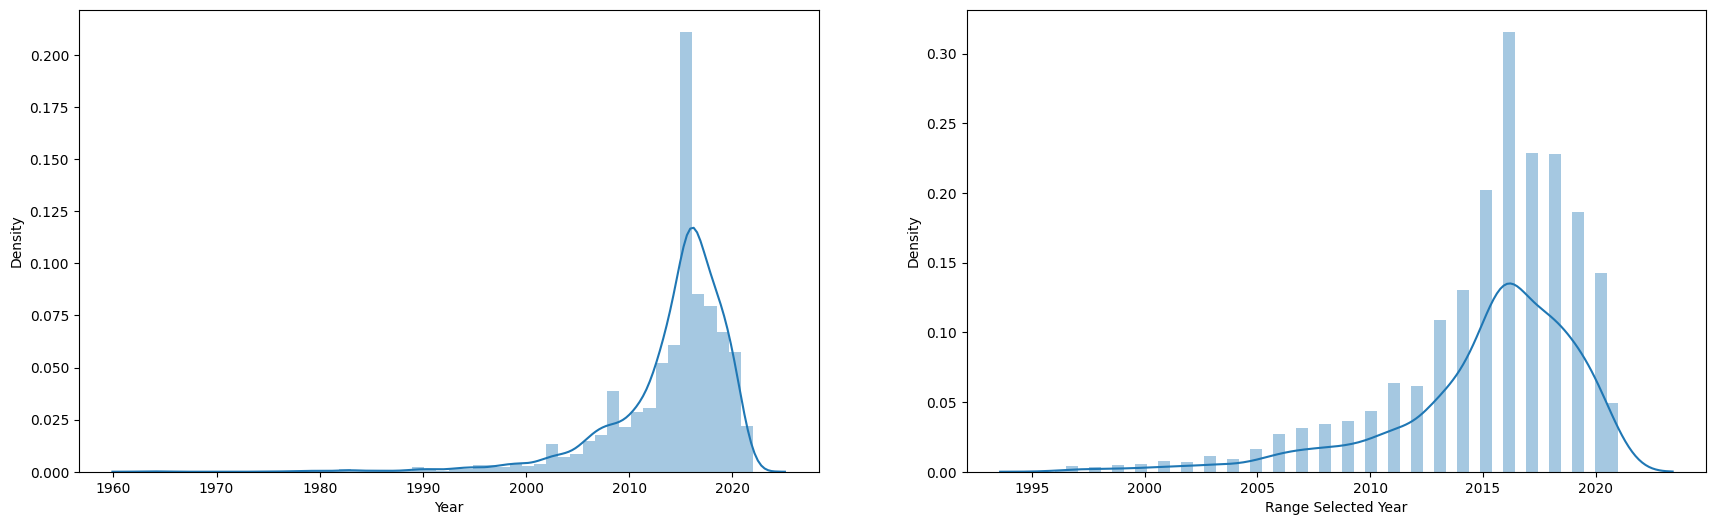

In [31]:
df_model= df_model.drop(df_model[df_model['Year']<1996].index)
# df_model= df_model.drop(df_model[df_model['Year']<2005].index)

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Year'], ax=axes[0])
sns.distplot(df_model['Year'], ax=axes[1])
axes[0].set_xlabel('Year')
axes[1].set_xlabel('Range Selected Year');

### **Handling Outlier Mileage**

Berdasarkan data outlier diatas terdapat Outlier pada kolom Mileage sebanyak 3.43%. Dalam realitanya semakin tinggi mileage berpengaruh terhadap `nilai jual, kondisi mesin/komponen, maintenance, dan semakin tinggi potensi masalah mekanis`. Namun apabila kita menghapus semua data outlier pada kolom Mileage kita akan kehilangan informasi sebanyak 3.43% dari data keseluruhan yang dapat mempengaruhi performa suatu model untuk memprediksi nilai  target. Sehingga handling outlier pada kolom Mileage kita akan drop data outlier yang ekstrim yaitu nilai Mileage >=20000000.

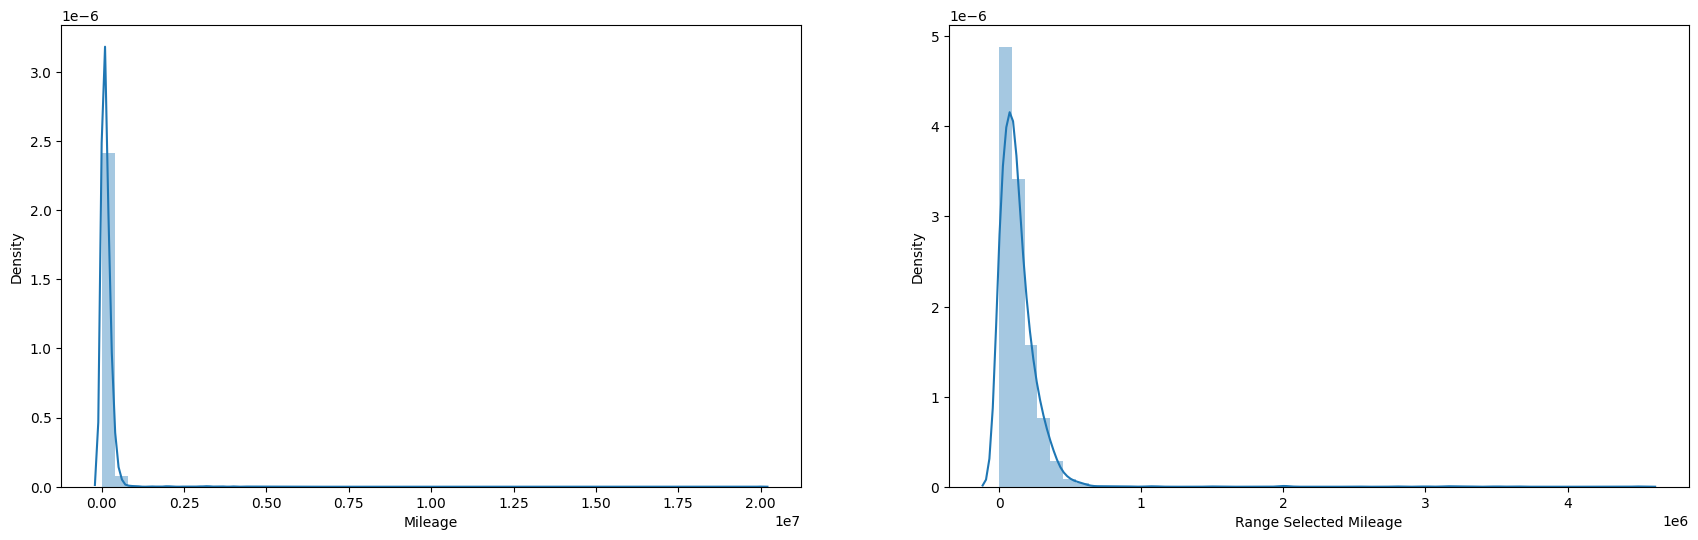

In [32]:
df_model= df_model.drop(df_model[df_model['Mileage']>= 20000000].index)

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Mileage'], ax=axes[0])
sns.distplot(df_model['Mileage'], ax=axes[1])
axes[0].set_xlabel('Mileage')
axes[1].set_xlabel('Range Selected Mileage');

### **Handling Outlier Price**

Berdasarkan tabel pengecekan outlier terdapat outlier pada tabel Price sebanyak 6.77%, apabila kita menghapus keseluruhan outlier akan berpengaruh terhadap limitasi model. Sehingga sebagai pertimbangan kita menggunakan domain knowledge mengenai harga mobil yang wajar berdasarkan website Syarah.com

Menurut [sumber:](https://syarah.com/filters?is_online=1&is_new=0&price_from=10000&sort=price) range harga pada website dibatasi dari range harga 10,000 SAR - 760,000 SAR. Namun berdasarkan hasil nilai Upper Price yaitu 185,000 terdapat 253 data dianggap terlalu besar apabila dilakukan drop. Sehingga kita menetapkan range harga 10,000 SAR - 760,000 SAR

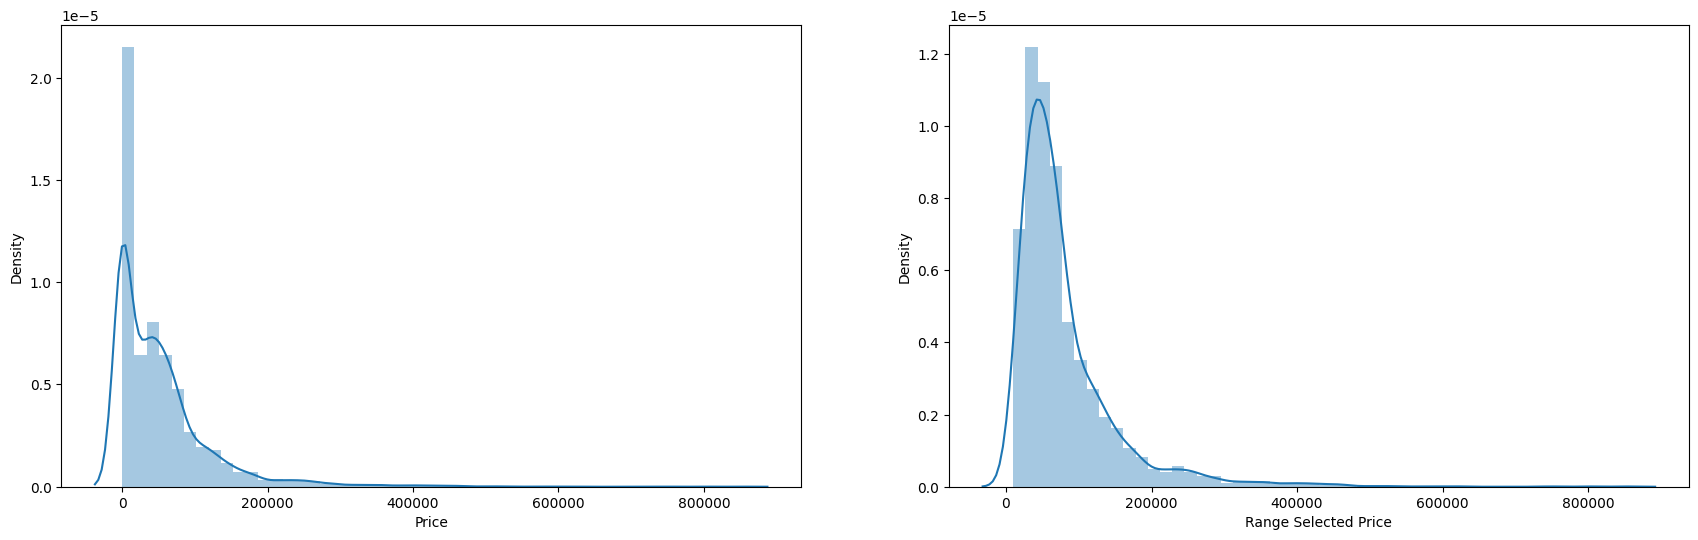

In [33]:
df_model= df_model.drop(df_model[df_model['Price']<10000].index)

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Price'], ax=axes[0])
sns.distplot(df_model['Price'], ax=axes[1])
axes[0].set_xlabel('Price')
axes[1].set_xlabel('Range Selected Price');

### **Handling Outlier Size_Engine**

Menurut sumber Syarah.com pada umumnya mobil yang di listing memiliki Size Engine < 7. Sehingga pada handling outlier pada Size engine kita akan drop data yang memiliki nilai size engine > 7

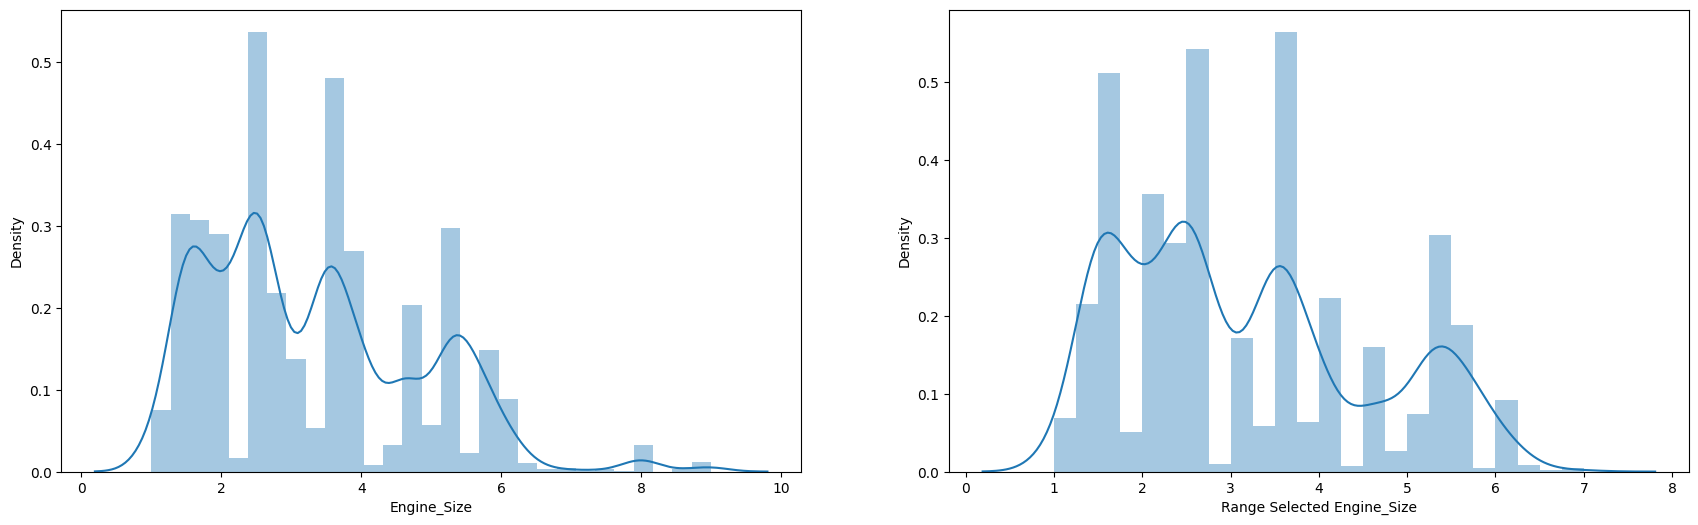

In [34]:
df_model= df_model.drop(df_model[df_model['Engine_Size']>7].index)

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Engine_Size'], ax=axes[0])
sns.distplot(df_model['Engine_Size'], ax=axes[1])
axes[0].set_xlabel('Engine_Size')
axes[1].set_xlabel('Range Selected Engine_Size');

In [35]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3654 entries, 2 to 5622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3654 non-null   object 
 1   Region       3654 non-null   object 
 2   Make         3654 non-null   object 
 3   Gear_Type    3654 non-null   object 
 4   Origin       3654 non-null   object 
 5   Options      3654 non-null   object 
 6   Year         3654 non-null   int64  
 7   Engine_Size  3654 non-null   float64
 8   Mileage      3654 non-null   int64  
 9   Price        3654 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 314.0+ KB


In [36]:
# Data Sebelum dilakukan cleaning
df.shape

(5624, 11)

In [37]:
# Data Setelah dilakukan data cleaning
df_model.shape

(3654, 10)

# **5. Data Analysis**

### **a. Numerical vs Price**

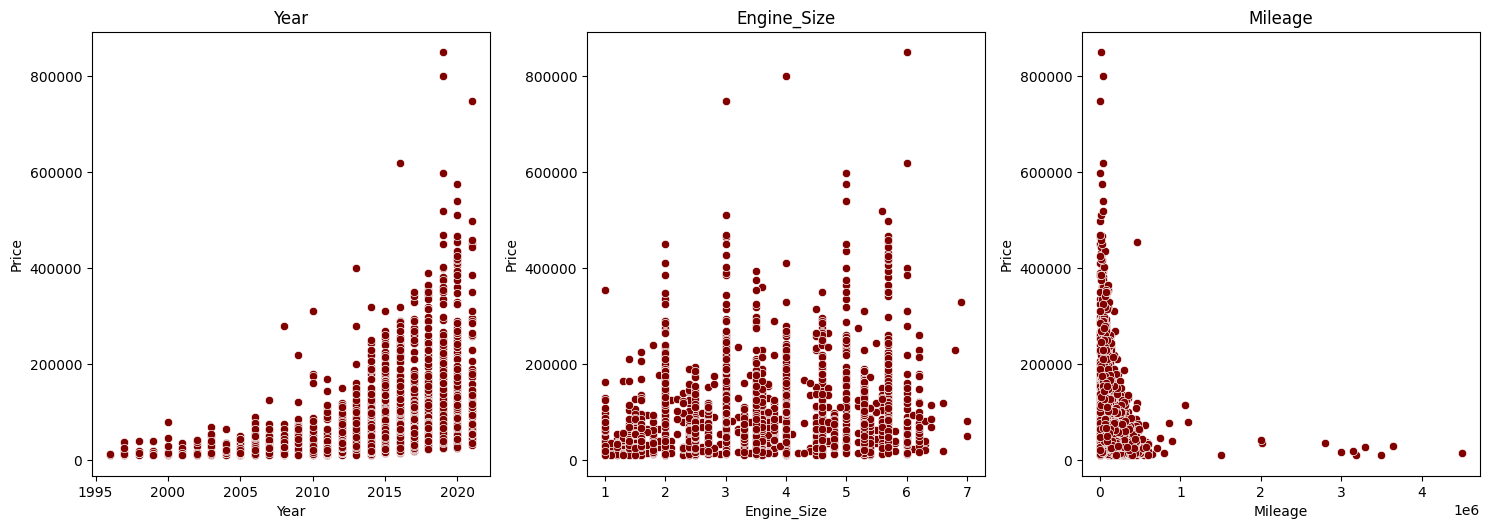

In [38]:
numerical_features = df_model.drop(columns= 'Price').describe().columns
plt.figure(figsize= (15, 15))
ax = 1

for col in numerical_features:

    plt.subplot(3, 3, ax)
    sns.scatterplot(data=df_model, x=col, y='Price', color='maroon')
    plt.title(f'{col}', size= 12)
    ax+= 1

plt.tight_layout()
plt.show()

Berdasarkan gambar diatas didapatkan informasi sebagai berikut:
- Semakin muda tahun mobil, harga mobil cenderung semakin tinggi
- Pada sebaran data Engine_Size tidak memiliki pola terhadap harga mobil
- Semakin rendah mileage (kilometer mobil) maka semakin mahal harga mobil. Hal ini berkaitan pada kualitas/perfoma mesin yang sudah dibahas pada handling outlier mileage sebelumnya

### **b. Categorical vs Price**

### **Make vs Price**

In [39]:
median_price_make = df_model.groupby('Make').agg({'Price':'median'}).sort_values('Price', ascending =False).reset_index()
median_price_make.head()

,Make,Price
0,Rolls-Royce,465000.0
1,Aston Martin,290000.0
2,Ferrari,280000.0
3,Bentley,265000.0
4,Land Rover,240000.0


In [40]:
median_price_make.tail()

,Make,Price
50,Renault,25500.0
51,FAW,25000.0
52,Lifan,25000.0
53,Mercury,24000.0
54,Škoda,15000.0


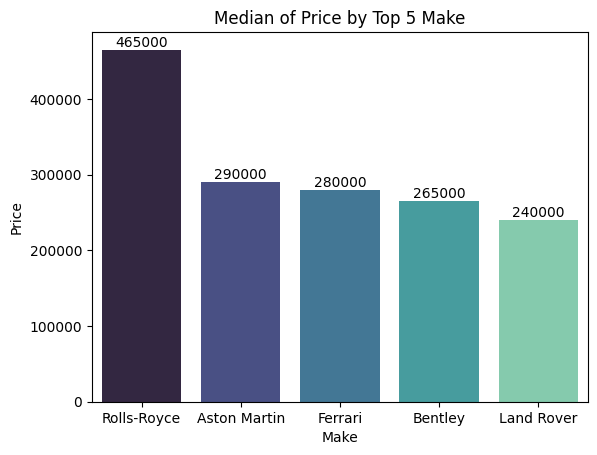

In [41]:
ax= sns.barplot(data= median_price_make.head(), x='Make', y='Price', palette='mako')

for i in range(5):
    ax.bar_label(ax.containers[i])
plt.title('Median of Price by Top 5 Make')
plt.show()

Berdasarkan grafik diatas 5 Merk mobil dengan Median Harga tertinggi yaitu Rolls-Royce, Aston Martin, Ferrari, Bentley dan Land Rover yang merupakan kategori mobil sport luxury. Sehingga memilki median harga yang tinggi

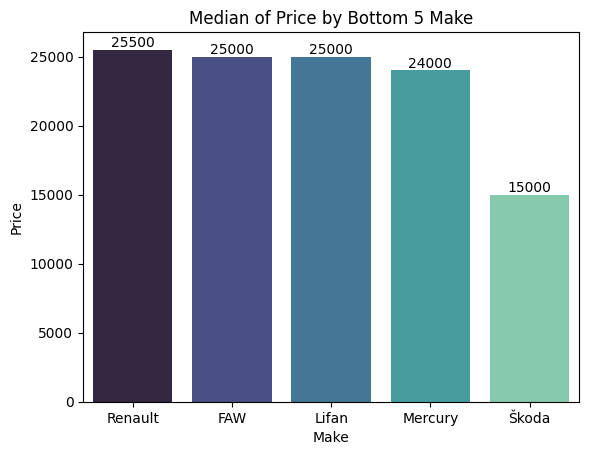

In [42]:
ax= sns.barplot(data= median_price_make.tail(), x='Make', y='Price',palette='mako')
for i in range(5):
    ax.bar_label(ax.containers[i])
plt.title('Median of Price by Bottom 5 Make')
plt.show()

Berdasarkan grafik diatas 5 Merk mobil dengan Median Harga terendah yaitu Renault, FAW, Lifan, Mercury, dan Skoda

### **Type vs Price**

In [43]:
median_price_type = df_model.groupby('Type').agg({'Price':'median'}).sort_values('Price', ascending =False).reset_index()
median_price_type.head()

,Type,Price
0,Bentayga,850000.0
1,Ghost,465000.0
2,Defender,450000.0
3,Vanquish,400000.0
4,Levante,385000.0


In [44]:
median_price_type.tail()

,Type,Price
305,EC8,11500.0
306,Savana,11500.0
307,Logan,10000.0
308,M,10000.0
309,Trailblazer,10000.0


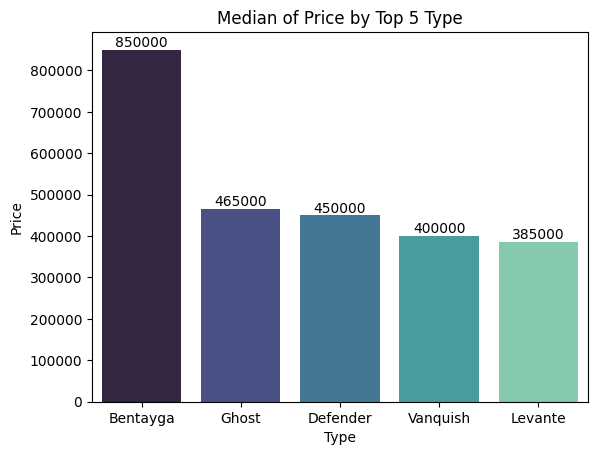

In [45]:
ax= sns.barplot(data= median_price_type.head(), x='Type', y='Price', palette='mako')
for i in range(5):
    ax.bar_label(ax.containers[i])
plt.title('Median of Price by Top 5 Type')
plt.show()

Grafik diatas menjelaskan 5 Type Mobil dengan harga tertinggi yaitu:
- Bentayga merupakan type mobil dengan kategori SUV
- Ghost merupakan type mobil dari merk mobil Rolls-Royce yang termasuk kategori mobil luxury
- Defender merupakan type mobil SUV dari merk Land Rover
- Vanquish merupakan type mobil dari merk mobil Aston Martin
- Levante merupakan type mobil dari merk mobil Maserati

Sehingga dapat kita simpulkan type mobil dengan median tertinggi berasal dari merk mobil sport luxury

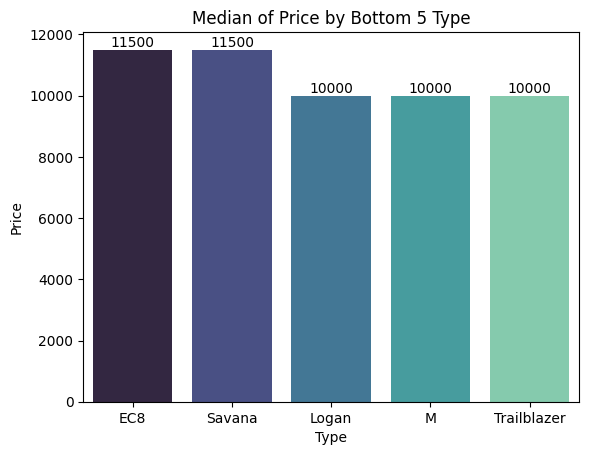

In [46]:
ax= sns.barplot(data= median_price_type.tail(), x='Type', y='Price', palette='mako')
for i in range(5):
    ax.bar_label(ax.containers[i])
plt.title('Median of Price by Bottom 5 Type')
plt.show()

Berdasarkan grafik diatas 5 Merk mobil dengan Median Harga terendah yaitu EC8, Savana, Logan, M, dan Trailblazer

### **Options vs Price**

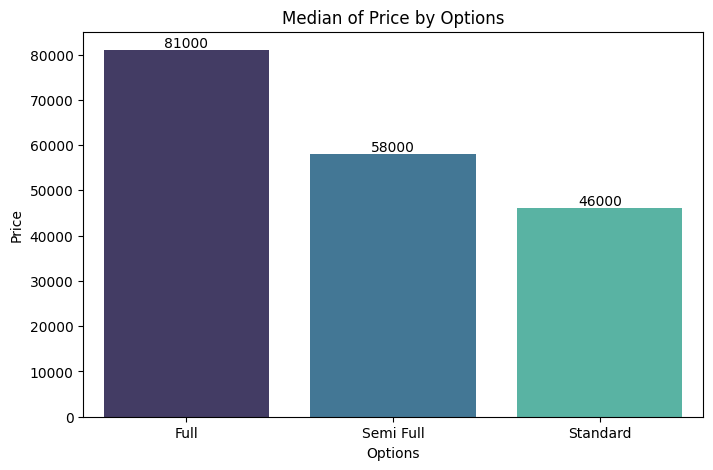

In [47]:
plt.figure(figsize= (8, 5))
ax = sns.barplot(data= df_model, x= 'Options', y= 'Price', estimator= 'median', ci=0, palette='mako')
for i in range(3):
    ax.bar_label(ax.containers[i])
plt.title('Median of Price by Options')
plt.show()

Berdasarkan grafik diatas didapatkan informasi bahwa median harga mobil dengan full option lebih besar dibandingkan semifull dan standard. Hal ini dikarenakan semakin lengkap opsi yang ditawarkan maka semakin tinggi harga mobilnya.

### **Gear Type vs Price**

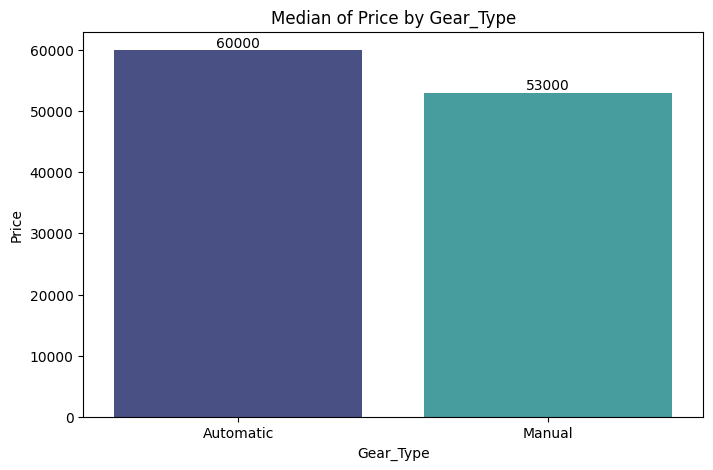

In [48]:
plt.figure(figsize= (8, 5))
ax = sns.barplot(data= df_model, x= 'Gear_Type', y= 'Price', estimator= 'median', ci=0, palette='mako')
for i in range(2):
    ax.bar_label(ax.containers[i])
plt.title('Median of Price by Gear_Type')
plt.show()

Berdasarkan grafik diatas didapatkan informasi bahwa median harga mobil dengan transisi Automatic lebih besar daripada median harga mobil dengan transisi manual.

### **Origin vs Price**

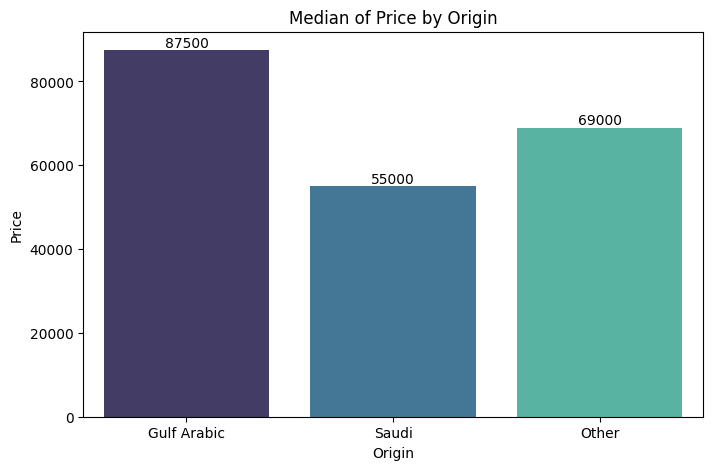

In [49]:
plt.figure(figsize= (8, 5))
ax = sns.barplot(data= df_model, x= 'Origin', y= 'Price', estimator= 'median', ci=0, palette='mako')
for i in range(3):
    ax.bar_label(ax.containers[i])
plt.title('Median of Price by Origin')
plt.show()

Berdasarkan grafik median harga mobil yang berasal dari Gulf Arabic memiliki median harga tertinggi dibandingkan mobil berasal dari Saudi dan Other.

### **Correlation Matrix**

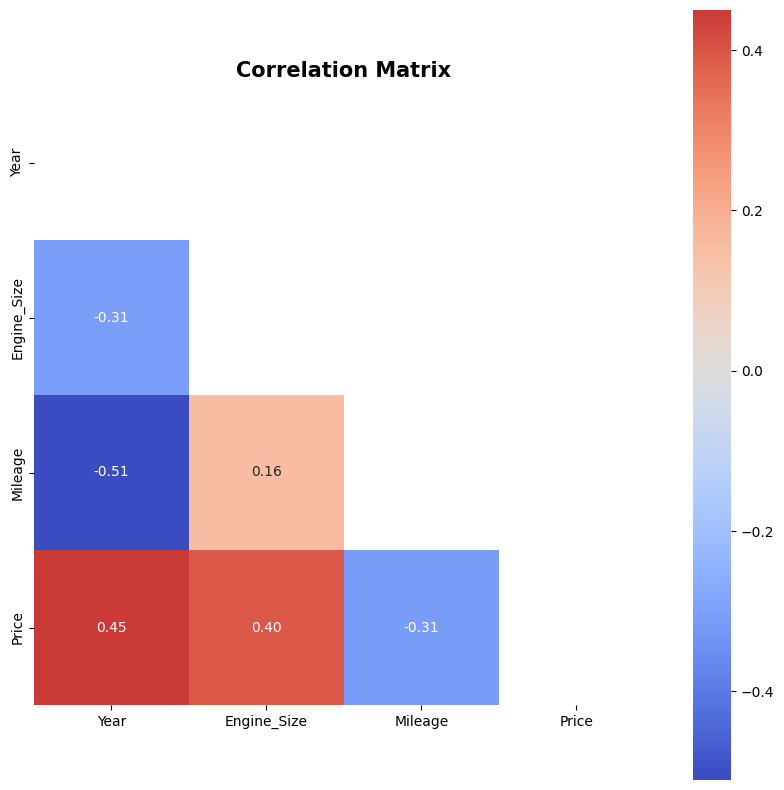

In [50]:
plt.figure(figsize=(10,10))
plt.title('Correlation Matrix',size=15, weight='bold')

matrix = np.triu(df_model.corr(method='spearman', numeric_only=True))

sns.heatmap(data=df_model.corr(method='spearman', numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm', center=0, mask = matrix, square='True')
plt.show()

Correlation matrix menunjukkan bahwa:
- Feature `Year` yang memiliki `korelasi positif` terhadap feature `Price`. Dimana korelasinya adalah moderat 0.45. Ini berarti semakin tinggi/tahunnya muda, maka harga mobil semakin mahal harganya.
- Feature `Engine Size` yang memiliki `korelasi positif` terhadap feature `Price`. Dimana korelasinya adalah moderat 0.40. Ini berarti semakin tinggi engine size, maka harga mobil semakin mahal harganya.
- Feature `Mileage` yang memiliki `korelasi negatif` terhadap feature `Price`. Dimana korelasinya adalah moderat 0.31. Ini berarti semakin tinggi mileagenya, maka harga mobil semakin murah harganya.

# **6. Modeling**

In [51]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

from category_encoders import BinaryEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

## **a. Encoding**

In [52]:
df_model.describe(include='object')

,Type,Region,Make,Gear_Type,Origin,Options
count,3654,3654,3654,3654,3654,3654
unique,310,27,55,2,3,3
top,Accent,Riyadh,Toyota,Automatic,Saudi,Full
freq,145,1570,854,3291,2771,1410


Langkah encoding ini merupakan langkah untuk mentranformasi fitur/kolom kategorikal menjadi kolom numerical. Berikut fitur/kolom yang dilakukan tahap Encoding:
1. `Type` menggunakan `Binary Encoding`, karena fitur ini tidak memiliki urutan/tidak ordinal, namun jumlah unique datanya banyak.
2. `Region` menggunakan `Binary Encoding`, karena fitur ini tidak memiliki urutan/tidak ordinal, namun jumlah unique datanya banyak.
3. `Make` menggunakan `Binary Encoding`, karena fitur ini tidak memiliki urutan/tidak ordinal, namun jumlah unique datanya banyak.
4. `Gear_Type` menggunakan `One Hot Encoding`, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
5. `Origin` menggunakan `One Hot Encoding`, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
6. `Options` menggunakan `One Hot Encoding`, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.

In [53]:
transformer= ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['Gear_Type', 'Origin', 'Options']),
    ('Binary',BinaryEncoder(), ['Type', 'Region', 'Make'] )
], remainder='passthrough')

## **b. Define Target & Features**

In [54]:
# feature
X = df_model.drop(columns='Price')

# target
y = df_model['Price']

## **c. Splitting**

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## **d. Modelling**

### **Scaling**

Kita akan menggunakan Robust Scaler karena data kita memiliki outlier dan Robust Scaler tidak akan terpengaruh oleh outlier.

In [56]:
# Define algoritma yang digunakan
linreg = LinearRegression()
knn = KNeighborsRegressor()
dtree = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)


# Scaling data
scaler = RobustScaler()

# Kandidat algoritma
models = [linreg, knn, dtree, rf, xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-52151.23140873 -60381.43255077 -46566.79239223 -51374.45497233
 -46206.49663461] LinearRegression()


[-31347.66135203 -36124.06847412 -30291.60395683 -32199.98446204
 -31367.12811893] LinearRegression()
[-0.58878012 -0.71449176 -0.58386222 -0.59876891 -0.5972774 ] LinearRegression()
[-38285.49458617 -42485.86911401 -35421.06743    -35033.31372559
 -31674.72197643] KNeighborsRegressor()
[-18110.64444444 -20696.31760684 -19537.21367521 -18822.78869863
 -18644.51712329] KNeighborsRegressor()
[-0.3126627  -0.31030336 -0.3267835  -0.30571405 -0.31431411] KNeighborsRegressor()
[-57556.65114381 -56629.15148177 -47176.75696183 -49983.72361053
 -66249.155462  ] DecisionTreeRegressor(random_state=0)
[-24471.33162393 -24396.14017094 -23557.00854701 -24178.74486301
 -28143.31164384] DecisionTreeRegressor(random_state=0)
[-0.43557274 -0.33710404 -0.3494896  -0.34871291 -0.38567329] DecisionTreeRegressor(random_state=0)
[-35526.62794237 -44803.84881494 -33842.64377509 -36866.27759768
 -25710.64817154] RandomForestRegressor(random_state=0)
[-16054.65374359 -19444.27616524 -17759.61598291 -18543.9501

In [57]:
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-51336.081592,5129.192471,-32266.089273,2021.811397,-0.616636,0.049234
1,KNN Regressor,-36580.093366,3621.743154,-19162.296310,892.537587,-0.313956,0.007037
2,DecisionTree Regressor,-55519.087732,6644.591760,-24949.307370,1629.010783,-0.371311,0.036036
3,RandomForest Regressor,-35350.009260,6113.833152,-17461.339016,1483.389099,-0.271232,0.010270
4,XGBoost Regressor,-35248.382143,5937.824336,-17597.466738,1204.563742,-0.269271,0.009745


Berdasarkan hasil diatas dapat dilihat dari ke-5 model yang telah diuji didapatkan 2 model yang direkomendasikan berdasarkan metric Evaluation yang terkecil untuk memprediksi data test set yaitu:
- `Random Forest Regressor`
- `XGBoost Regressor`

Metric Evaluation RMSE memiliki nilai error yang lebih tinggi dibandingkan dengan nilai MAE dan MAPE. Hal ini disebabkan karena nilai residual atau errornya dikuadratkan terlebih dahulu sebelum dirata-ratakan, sehingga akan memberikan nilai error yang lebih tinggi.

### **Predict to Test Set**

Prediksi pada test set dengan menggunakan model Random Forest dan XGBoost

In [58]:
models = {
    'RandomForest' : RandomForestRegressor(random_state=0),
    'XGB' : XGBRegressor(random_state=0)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set

for i in models:
    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

In [59]:
score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
RandomForest,28636.029679,15407.786790,0.230050
XGB,28531.913409,15583.107692,0.227423


Model setelah difitting ke data test set ternyata memilki performa yang lebih baik karena nilai errornya berkurang.
1. Random Forest
    - (RMSE sebelum: 35350.009260,	MAE: 17461.339016,	MAPE: 0.271232)
    - (RMSE setelah: 28636.029679,	MAE: 15407.786790,	MAPE: 0.230050)
2. XGB Regressor
    - (RMSE sebelum: 35248.382143,	MAE: 17597.466738,	MAPE: 0.269271)
    - (RMSE setelah: 28531.913409,	MAE: 15583.107692,	MAPE: 0.227423)

Sehingga langkah selanjutnya, kita melakukan Hyperparameter Tunning untuk meningkatkan performa model

## **e. Hyperparameter Tunning**

**XGBoost**

In [60]:
# Kedalaman pohon
max_depth = list(np.arange(2, 11))

# Learning rate
learning_rate = [0.01, 0.05, 0.1, 0.2]

# Jumlah pohon
n_estimators = list(np.arange(50, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


In [61]:
# Hyperparam space XGboost
hyperparam_space_xgb = {
    'modeling__max_depth': max_depth, 
    'modeling__learning_rate': learning_rate,
    'modeling__n_estimators': n_estimators,
    'modeling__subsample': subsample,
    'modeling__gamma': gamma,
    'modeling__colsample_bytree': colsample_bytree,
    'modeling__reg_alpha': reg_alpha,
    'scaling' : [StandardScaler(), RobustScaler(), None]
}
xgb = XGBRegressor()

In [62]:
estimator_xgb = Pipeline([
    ('preprocessing', transformer),
    ('scaling', scaler),
    ('modeling', xgb)
])

random_xgb = RandomizedSearchCV(
    estimator= estimator_xgb,
    param_distributions= hyperparam_space_xgb,
    n_iter= 100,
    cv = 5,
    scoring= 'neg_mean_absolute_percentage_error',
    n_jobs= -1,
    random_state= 0
)

In [63]:
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Gear_Type',
                                                                                'Origin',
                                                                                'Options']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Type',
                                                                                'Region',
                                                                                'Make'])])),
                                             ('scaling', RobustScaler()),
                                             ('modeling',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           co...
                                        'modeling__reg_alpha': [0.001,
                                                                0.0027825594022071257,
                                                                0.007742636826811269,
                                                                0.021544346900318832,
                                                                0.05994842503189409,
                                                                0.1668100537200059,
                                                                0.46415888336127775,
                                                                1.2915496650148828,
                                                                3.593813663804626,
                                                                10.0],
                                        'modeling__subsample': [0.2, 0.3, 0.4,
                                                                0.5, 0.6, 0.7,
                                                                0.8, 0.9],
                                        'scaling': [StandardScaler(),
                                                    RobustScaler(), None]},
                   random_state=0,
                   scoring='neg_mean_absolute_percentage_error')

In [64]:
random_xgb.best_score_

-0.2472663702031081

**Random Forest**

In [65]:
# Jumlah pohon
n_estimators = list(np.arange(50, 201))

# metric untuk menentukan splitting
criterion = ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']

# Kedalaman pohon
max_depth = list(np.arange(2, 11))

# Jumlah minimum sampel yang diperlukan untuk melakukan splitting
min_samples_split = list(np.arange(2, 31))

# Jumlah minimum sampel yang berada di setiap leaf
min_samples_leaf = list(np.arange(1, 31))

# Jumlah fitur yang dipakai untuk setiap split
max_features = list(np.arange(2, 11))

# Penggunaan bootstrap dalam membangun pohon-pohon
bootstrap = [True, False]

# Hyperparam space Random Forest
hyperparam_space_rf = {
    'modeling__n_estimators' : n_estimators,
    'modeling__criterion' : criterion,
    'modeling__max_features' : max_features,
    'modeling__max_depth' : max_depth,
    'modeling__min_samples_split' : min_samples_split,
    'modeling__min_samples_leaf' : min_samples_leaf,
    'modeling__bootstrap' : bootstrap,
    'scaling' : [MinMaxScaler(), StandardScaler(), RobustScaler(), None]
}
rf = RandomForestRegressor(random_state=0)

estimator_rf = Pipeline([
    ('preprocessing', transformer),
    ('scaling', scaler),
    ('modeling', rf)
])

random_rf = RandomizedSearchCV(
    estimator= estimator_rf,
    param_distributions= hyperparam_space_rf,
    n_iter= 100,
    cv = 5,
    scoring= 'neg_mean_absolute_percentage_error',
    n_jobs= -1,
    random_state= 0
)

In [66]:
random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Gear_Type',
                                                                                'Origin',
                                                                                'Options']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Type',
                                                                                'Region',
                                                                                'Make'])])),
                                             ('scaling', RobustScaler()),
                                             ('modeling',
                                              RandomForestRegressor(random_state=0))]),
                   n_iter=100, n_jobs=...
                                        'modeling__min_samples_split': [2, 3, 4,
                                                                        5, 6, 7,
                                                                        8, 9,
                                                                        10, 11,
                                                                        12, 13,
                                                                        14, 15,
                                                                        16, 17,
                                                                        18, 19,
                                                                        20, 21,
                                                                        22, 23,
                                                                        24, 25,
                                                                        26, 27,
                                                                        28, 29,
                                                                        30],
                                        'modeling__n_estimators': [50, 51, 52,
                                                                   53, 54, 55,
                                                                   56, 57, 58,
                                                                   59, 60, 61,
                                                                   62, 63, 64,
                                                                   65, 66, 67,
                                                                   68, 69, 70,
                                                                   71, 72, 73,
                                                                   74, 75, 76,
                                                                   77, 78, 79, ...],
                                        'scaling': [MinMaxScaler(),
                                                    StandardScaler(),
                                                    RobustScaler(), None]},
                   random_state=0,
                   scoring='neg_mean_absolute_percentage_error')

In [67]:
random_rf.best_score_

-0.3099049136006904

### **Predict to Test Set after Hyperparameter Tuning**

Prediksi pada test set dengan menggunakan model Random Forest dan XGBoost dan dilakukan proses Hyperparameter Tunning

In [68]:
models = {
    'RandomForest' : RandomForestRegressor(random_state=0),
    'XGB' : XGBRegressor(random_state=0)
}

score_rmse = []
score_mae = []
score_mape = []

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_
rf_tuning = random_rf.best_estimator_

for i in [rf_tuning, xgb_tuning]:
    # Fitting model
    i.fit(X_train, y_train)

    # Predict test set
    y_pred_tuning =i.predict(X_test)

    # Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
    rmse_tuning = np.sqrt(mean_squared_error(y_test, y_pred_tuning))
    mae_tuning = mean_absolute_error(y_test, y_pred_tuning)
    mape_tuning = mean_absolute_percentage_error(y_test, y_pred_tuning)

    score_rmse.append(rmse_tuning)
    score_mae.append(mae_tuning)
    score_mape.append(mape_tuning)
score_after_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_after_tuning

,RMSE,MAE,MAPE
RandomForest,32153.471140,17651.087610,0.267350
XGB,26057.738245,13636.634197,0.193752


### **Performance Comparisson**

In [69]:
score_before_tuning

,RMSE,MAE,MAPE
RandomForest,28636.029679,15407.786790,0.230050
XGB,28531.913409,15583.107692,0.227423


In [70]:
score_after_tuning

,RMSE,MAE,MAPE
RandomForest,32153.471140,17651.087610,0.267350
XGB,26057.738245,13636.634197,0.193752


Berdasarkan brenchmark model didapatkan 2 model yaitu Random Forest dan XGB Regressor yang memiliki performa terbaik berdasarkan nilai metric evaluation. Dapat dilihat kondisi performa kedua model ketika dilakukan Hyperparameter Tuning:
- Model Random Forest, dari nilai RMSE mengalami peningkatan performa namun berdasarkan nilai MAE dan MAPE mengalami penurunan performa (nilai MAE & MAPE mengalami kenaikan)
- Model XGB Boost mengalami peningkatan performa berdasarkan nilai RMSE, MAE, dan MAPE mengalami kenaikan

Sehingga best model yang akan digunakan untuk melakukan prediksi yaitu `XGB Regressor model`

### **Best Model**

In [71]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=0)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,26057.738245,13636.634197,0.193752


In [72]:
xgboost_tuning= random_xgb.best_estimator_
xgboost_tuning

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gear_Type', 'Origin',
                                                   'Options']),
                                                 ('Binary', BinaryEncoder(),
                                                  ['Type', 'Region',
                                                   'Make'])])),
                ('scaling', StandardScaler()),
                ('modeling',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_byn...
                              feature_types=None, gamma=8, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=7, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=182, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

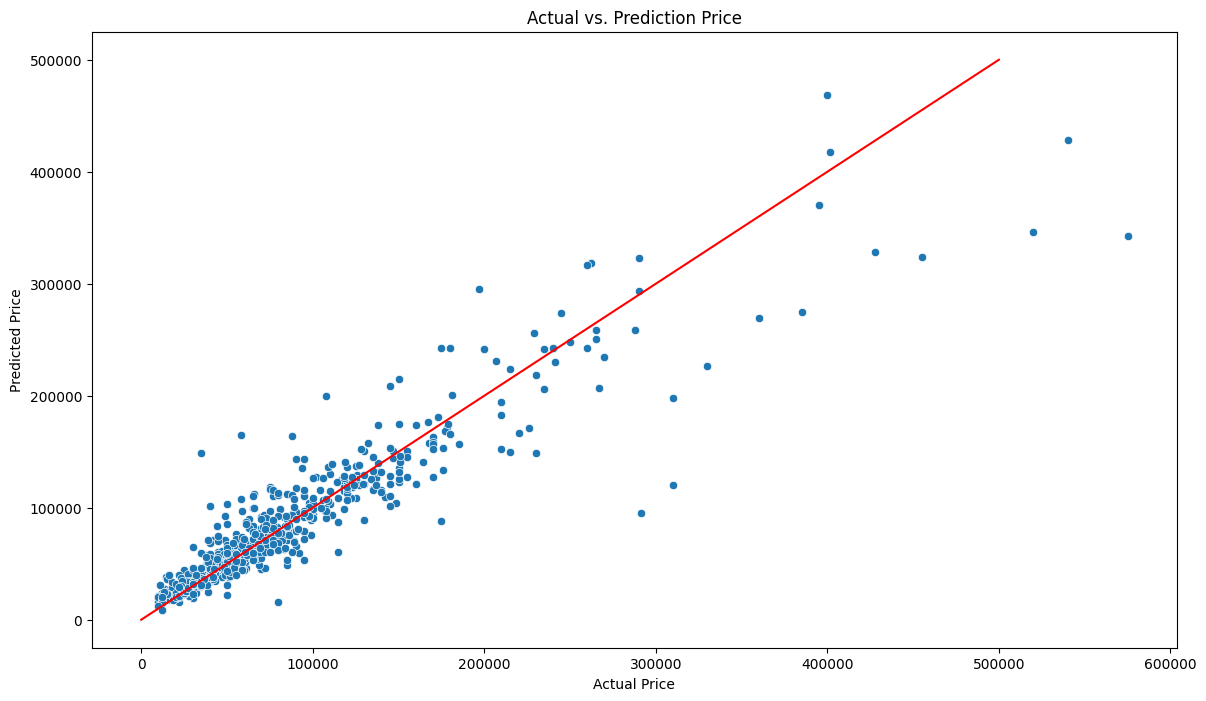

In [73]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price')
sns.lineplot(x=range(0,500001), y=range(0,500001), color='red')
plt.show()

Dari gambar diatas didapatkan informasi sebagai berikut:
- Harga aktual dan Harga yang diprediksi memiliki hubungan positif, semakin tinggi Price Actual maka semakin tinggi juga Price Predictionnya
- Dapat dilihat juga sebaran titik mendekati garis linear, maka semakin baik model memprediksi Price
- Namun, tidak linear sempurna. Model cenderung bekerja efektif pada price < 200,000 karena sebaran titik mendekati garis linear (ketepatan model memprediksi nilai)
- Dapat terlihat pada price > 200,000, semakin besar harga mobilnya model cenderung bersifat underestimate dimana model cenderung memprediksi harga yang lebih rendah dari aktualnya dan nilai errornya cukup tinggi. 
- Hal ini disebabkan data Price > 200,000 lebih sedikit dari sebaran data <200,000, sehingga model kurang mempelajari data Price > 200,000 dan hasil prediksinya kurang baik

Menurut Lewis (1982) semakin kecil nilai MAPE maka semakin kecil kesalahan hasil prediksi, sebaliknya semakin besar nilai MAPE maka semakin besar kesalahan hasil prediksi. Hasil suatu metode prediksi mempunyai kemampuan peramalan sangat baik jika nilai MAPE < 10% dan mempunyai kemampuan prediksi baik jika nilai MAPE diantara 10% dan 20%.

Berdasarkan `nilai MAPE` atau estimasi rata-rata error diangka sekitar `19.3%`,  menjadikan `model XGB Regressor` ini dapat dikatakan memiliki kemampuan memprediksi dengan baik.

*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*

## **f. Feature Importance**

In [74]:
pd.DataFrame({
            'Feature' : transformer.get_feature_names_out(),
            'Importance' : random_xgb.best_estimator_['modeling'].feature_importances_
            }).sort_values(by = 'Importance', ascending = False).head()

,Feature,Importance
25,remainder__Year,0.141104
26,remainder__Engine_Size,0.083996
22,Binary__Make_3,0.071405
4,One Hot__Options_Standard,0.071241
20,Binary__Make_1,0.064068


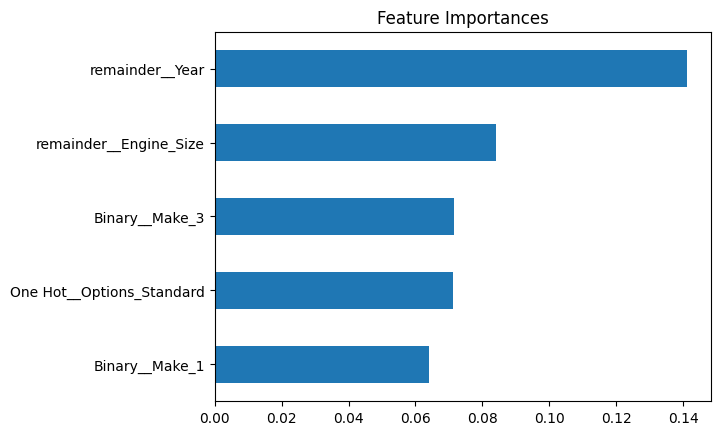

In [75]:
# Plot feature importances
feature_imp = pd.Series(xgboost_tuning['modeling'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head()
feature_imp[::-1].plot(kind='barh', title='Feature Importances');

Grafik diatas menunjukkan feature yang paling berpengaruh terhadap Price yaitu:
- Year
- Engine Size
- Make_3
- Options_Standar
- Make_1

Sesuai dengan nilai correlation, feature Year memiliki nilai corellation tertinggi dibanding nilai feature numerical lainnya. Feature `Year` yang memiliki `korelasi positif` terhadap feature `Price`. Dimana korelasinya adalah moderat 0.45. Ini berarti semakin tinggi/tahunnya muda, maka harga mobil semakin mahal harganya. Dan berdasarkan scatterplot sebaran data memperlihatkan semakin muda tahun mobil harga cenderung semakin tinggi. Sehingga apabila penjual atau calon listing mobil pada Syarah.com ingin menjual harga mobil dengan harga yang tinggi salah satunya dapat dipengaruhi oleh Tahun mobil yang muda.

Berdasarkan nilai correlation menjelaskan bahwa hubungan `Engine_Size` terhadap `Price` memiliki hubungan positif, semakin tinggi nilai Engine_Size maka semakin mahal harga mobil. 

Feature Options menunjukkan kelengkapan/package mobil yang disediakan oleh penjual. Semakin lengkap (full) opsi yang ditawarkan maka semakin tinggi harga mobilnya.

Untuk feature Merk mobil yang paling berpengaruh terhadap Harga yaitu Make_3 dan Make_1. Dikarenakan kedua feature ini merupakan Binary Encoding, sehingga sulit untuk dilakukan interpretasi atau dengan kata lain kita tidak dapat mengetahui detail Merk(Merk_3 dan Merk_1) apa yang paling berpengaruh terhadap Price  (kelemahan Binary Encoding : sulit untuk diinterpretasikan)

## **G. SHAP**

In [76]:
final_model= xgboost_tuning
final_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gear_Type', 'Origin',
                                                   'Options']),
                                                 ('Binary', BinaryEncoder(),
                                                  ['Type', 'Region',
                                                   'Make'])])),
                ('scaling', StandardScaler()),
                ('modeling',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_byn...
                              feature_types=None, gamma=8, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=7, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=182, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [77]:
# tahap preprocessing (encoding dan scaling)
final_model[:-2]

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gear_Type', 'Origin',
                                                   'Options']),
                                                 ('Binary', BinaryEncoder(),
                                                  ['Type', 'Region',
                                                   'Make'])]))])

In [78]:
# algoritma/model
final_model[-1]

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=8, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=182, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [79]:
# membuat data train yang dipreprocessing menggunakan onehot dan scaler
X_train_encod = final_model[:-2].fit_transform(X_train)

In [80]:
final_model[0]

ColumnTransformer(remainder='passthrough',
                  transformers=[('One Hot', OneHotEncoder(drop='first'),
                                 ['Gear_Type', 'Origin', 'Options']),
                                ('Binary', BinaryEncoder(),
                                 ['Type', 'Region', 'Make'])])

In [81]:
final_model[0].transformers_[1][1].get_feature_names_out()

array(['Type_0', 'Type_1', 'Type_2', 'Type_3', 'Type_4', 'Type_5',
       'Type_6', 'Type_7', 'Type_8', 'Region_0', 'Region_1', 'Region_2',
       'Region_3', 'Region_4', 'Make_0', 'Make_1', 'Make_2', 'Make_3',
       'Make_4', 'Make_5'], dtype=object)

In [82]:
# membuat nama kolom
onehot_feature = list(final_model[0].transformers_[0][1].get_feature_names_out())
binary_feature = list(final_model[0].transformers_[1][1].get_feature_names_out())
remainder_feature = list(X_train.columns[final_model[0].transformers_[2][2]])
feature_names = onehot_feature + binary_feature + remainder_feature

In [83]:
pip install shap


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [84]:
import shap

In [85]:
X_train_encod

array([[0.000e+00, 0.000e+00, 1.000e+00, ..., 2.016e+03, 1.600e+00,
        1.470e+05],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 2.018e+03, 2.500e+00,
        8.500e+04],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 2.015e+03, 3.300e+00,
        1.220e+02],
       ...,
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 2.010e+03, 1.300e+00,
        9.300e+04],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.012e+03, 3.000e+00,
        1.310e+05],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.016e+03, 2.000e+00,
        1.200e+05]])

In [86]:
final_model[-1]

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=8, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=182, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

 98%|===================| 2854/2923 [00:23<00:00]        

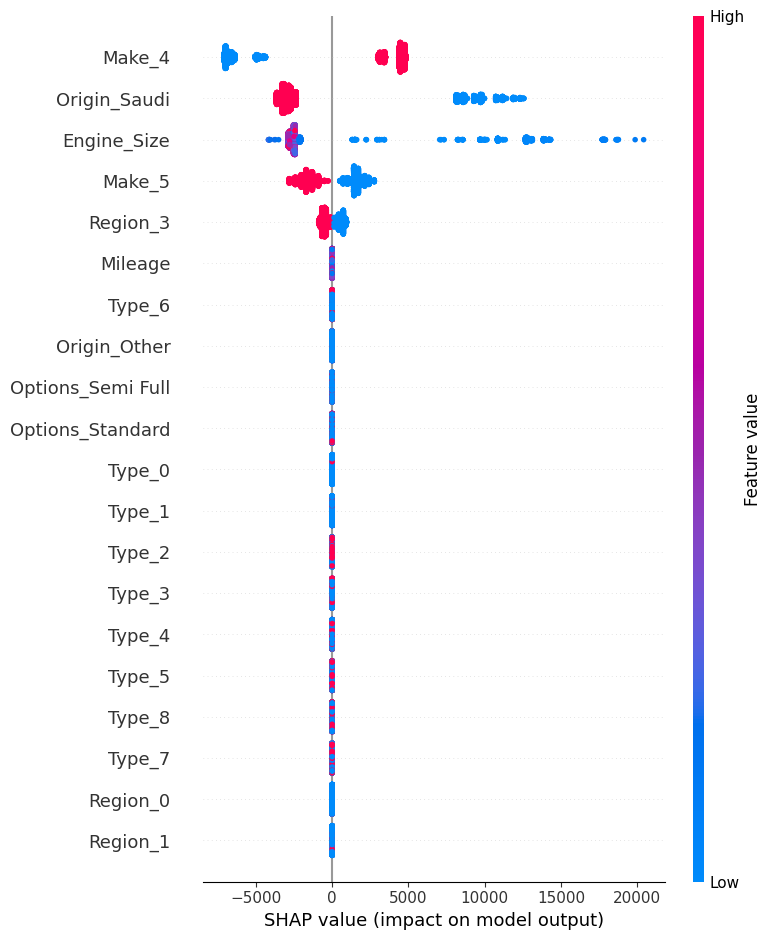

In [87]:
shap_values = shap.TreeExplainer(final_model[-1],                                           # model
                                 data = X_train_encod,                                    # data train dipreprocess
                                 feature_dependence="independent").shap_values(X_train_encod)
                                 
shap.summary_plot(shap_values, X_train_encod,feature_names = feature_names)

## **g. Confusion Matrix/Residual Plot**

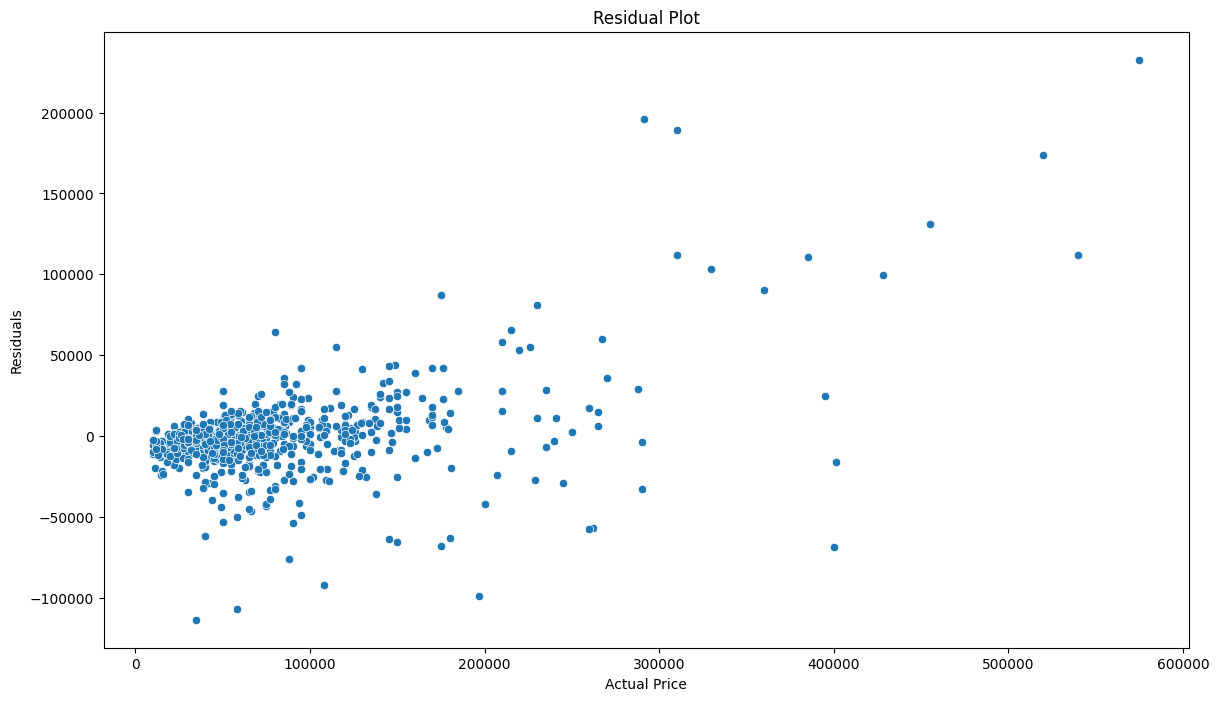

In [88]:
residuals = y_test - y_pred_xgb_tuning

plt.figure(figsize=(14, 8))
sns.scatterplot(x=y_test, y=residuals)
plt.title('Residual Plot')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.show()

Dari sebaran residual diatas dapat dilihat bahwa nilai prediksi yang underestimate memiliki error besar terjadi pada sekitar price > 200,000. Hal ini disebabkan data price > 200,000 sedikit, sehingga model 'kurang belajar' dari data tersebut.

## **h. Cost Benefit Analysis**

In [89]:
df_error = pd.DataFrame({
    'y_actual' : y_test,
    'y_prediksi' : y_pred_xgb_tuning  
})

df_error['error'] = df_error['y_actual'] - df_error['y_prediksi']

df_error

,y_actual,y_prediksi,error
4350,61000,46414.578125,14585.421875
3935,69500,73922.859375,-4422.859375
1551,79000,77701.093750,1298.906250
5108,197000,295637.687500,-98637.687500
3759,12000,8591.800781,3408.199219
...,...,...,...
3126,260000,242523.031250,17476.968750
4660,39000,70900.382812,-31900.382812
344,53500,68247.875000,-14747.875000
1043,55000,58419.136719,-3419.136719


In [90]:
Transaksi_Aktual = df_error['y_actual'].sum()
Transaksi_Prediksi = df_error['y_prediksi'].sum()
Selisih_Transaksi = Transaksi_Aktual-Transaksi_Prediksi

In [91]:
df_transaksi = pd.DataFrame({
    'Transaksi Aktual' : Transaksi_Aktual,
    'Transaksi Prediksi' : Transaksi_Prediksi
},index=[0]).T.reset_index().rename(columns={'index' : 'Transaksi', 0 : 'Harga (SAR)'})

df_transaksi

,Transaksi,Harga (SAR)
0,Transaksi Aktual,57859900.0
1,Transaksi Prediksi,58013444.0


Menurut situs Syarah.com terdapat beberapa sumber profit bagi Syarah.com diantaranya:
- Biaya iklan atau pemasangan
- Pembagian hasil penjualan
- Paket berlangganan
- Fitur tambahan berbayar

Ketentuan pembagian hasil penjualan dapat disepakati sebagai berikut:
- Persentase tetap 
- Persentase variable
- Komisi berjenjang

Umumnya, platform seperti Syarah.com biasanya mengambil komisi sebagai persentase dari nilai penjualan kendaraan yang terjual melalui situs mereka. Persentase komisi ini bisa berada dalam kisaran sekitar 1% hingga 5% dari harga penjualan, tetapi angka ini sangat bergantung pada kebijakan yang diberlakukan oleh Syarah.com

Untuk cost benefit analisis kita gunakan `persentase komisi yang akan diberikan kepada Syarah.com yaitu sebesar 5%`

In [92]:
Keuntungan_aktual= Transaksi_Aktual*0.05
Keuntungan_prediksi= Transaksi_Prediksi*0.05

In [93]:
df_keuntungan = pd.DataFrame({
    'Keuntungan Aktual' : Keuntungan_aktual,
    'Keuntungan Prediksi' : Keuntungan_prediksi
},index=[0]).T.reset_index().rename(columns={'index' : ' ', 0 : 'Keuntungan (SAR)'})

df_keuntungan

,,Keuntungan (SAR)
0,Keuntungan Aktual,2892995.0
1,Keuntungan Prediksi,2900672.2


Dengan menggunakan pemodelan XGB Regressor hasil prediksi, `diprediksi dapat meningkatkan keuntungan sebesar 0.26%`, dengan asumsi unit/feature yang sama seperti aktualnya. Agar lebih mengetahui batasan model apa saja dibutuhkan akan dijelaskan pada Model Limitation berikut ini:

## **i. Model Limitation**

| Fitur | Tipe Data | Limitasi | 
| --- | --- | --- | 
| Type | Object | Semua nilai unik kolom 'Type' pada dataset (310 tipe mobil) |
| Region | Object | Semua nilai unik kolom 'Region' pada dataset (27 region)|
| Make | Object | Semua nilai unik kolom 'Make' pada dataset (55 Perusahaan) |
| Gear_Type | Object | Semua nilai unik kolom 'Gear Type' pada dataset (Automatic dan Manual) | 
| Origin | Object | Semua nilai unik kolom 'Origin' pada dataset (3 daerah asal) | 
| Options | Object | Semua nilai unik kolom 'Options Type' pada dataset (Full, Semi Full, Standard) | 
| Year | Integer | Mobil yang dibuat pada diantara tahun 1996 sampai 2021 | 
| Engine_Size | Float | Mobil yang kapasitas mesinnya berukuran 1 L - 7 L |
| Mileage | Integer | Mobil yang Jarak tempuhnya 100 KM - 4500,000 KM |
| Price | Integer | Mobil dengan rentang harga 10,000 SAR - 850,000 SAR |

## **j. Conclusion**

Berdasarkan model diatas didapatkan kesimpulan sebagai berikut:
- Model yang terpilih untuk memprediksi yaitu XGB Regressor
- Setelah model dipredict ke test set lalu dilakukan Hyperparameter Tuning Model XGB Regressor mengalami kenaikan performa berdasarkan nilai MAPE sebesar 7.4% (before: 26.7%, after: 19.3%)
- Berdasarkan `nilai MAPE` atau estimasi rata-rata error diangka sekitar `19.3%`,  menjadikan `model XGB Regressor` ini dapat dikatakan memiliki kemampuan memprediksi dengan baik
- 5 Feature important pada model ini yaitu `Year, Engine Size, Make_3, Options_Standar, Make_1`

## **k. Recomentadion**

- Untuk meningkatkan analisis pemodelan, ketika suatu data yang memiliki harga yang masih dinegosiasikan seharusnya pada kolom price tidak diisikan nilai nol. Tetap diisikan harga minimal mobil (open price from). Agar kita tidak banyak drop data yang dapat menyebabkan informasi nilai dari kolom lainnya
- Untuk mengukur seberapa baik model beroperasi di dunia nyata, jalankan eksperimen A/B pada mobil yang memiliki tingkat penjualan tinggi. Bandingkan antara mobil yang dijual dengan menggunakan harga yang diprediksi oleh model dengan mobil yang dijual tanpa penggunaan harga yang diprediksi (determinasi langsung oleh pengguna tanpa saran)
- Menambahkan fitur inspeksi (skor inspeksi) kondisi dalam data, informasi ini dapat diklasifikasikan ke dalam beberapa kategori, seperti: sangat baik, baik, cukup, kurang, dan sangat kurang. Penambahan ini diharapkan dapat memberikan kontribusi besar bagi model dalam merancang prediksi harga.

In [94]:
# Save model
import pickle

In [95]:
# best model
finalmodel = random_xgb.best_estimator_

In [96]:
# fitting model
finalmodel.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gear_Type', 'Origin',
                                                   'Options']),
                                                 ('Binary', BinaryEncoder(),
                                                  ['Type', 'Region',
                                                   'Make'])])),
                ('scaling', StandardScaler()),
                ('modeling',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_byn...
                              feature_types=None, gamma=8, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=7, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=182, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [97]:
# save
pickle.dump(finalmodel, open('Model_Saudi_Car_Used_XGB.sav', 'wb'))